In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import talib
import time
import sys
import mpl_finance as mpf #替换 import matplotlib.finance as mpf
import matplotlib.gridspec as gridspec#分割子图                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [2]:
import tushare as ts
import json
import time
import datetime
import statsmodels.api as sm
from statsmodels import regression
from concurrent.futures import ThreadPoolExecutor

In [3]:
from getdata import pro_daily_stock,bs_k_daily_stock
from datavisualize import DefTypesPool, MplTypesDraw, MplVisualIf

In [4]:
app = MplVisualIf()

In [5]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

## 建立多维的度量体系

### 交易盈亏区间的可视化

In [6]:
stock_dat = bs_k_daily_stock('000651', '2018-01-01', '2019-06-01')

login success!
logout success!


In [7]:
df_csvload_trade = pd.read_csv('GLDQ000651.csv', index_col=None, parse_dates=[2, 3], encoding='gb2312')

In [8]:
df_csvload_trade

,Code,Name,Buy-Time,Sell-Time,Number,Buy-Price,Sell-Price
0,000651.SZ,格力电器,2018-06-01,2018-06-13,1000,46.71,49.28
1,000651.SZ,格力电器,2018-07-06,2018-08-01,1000,43.19,42.45
2,000651.SZ,格力电器,2018-09-12,2018-10-08,1000,35.64,37.33
3,000651.SZ,格力电器,2018-12-27,2019-03-07,1000,35.85,45.74
4,000651.SZ,格力电器,2019-03-27,2019-04-22,1000,45.08,61.14
5,000651.SZ,格力电器,2019-05-14,2019-05-30,1000,53.25,52.94


In [9]:
stock_dat = stock_dat.assign(Signal = np.nan)  #创建一个名为Signal的新列并将该列数据填入NaN

In [10]:
stock_dat

,Open,Close,High,Low,Volume,Signal
date,,,,,,
2018-01-02,44.20,45.15,45.20,44.18,587146.42,NaN
2018-01-03,45.30,45.65,46.46,45.20,794304.89,NaN
2018-01-04,46.00,46.58,46.58,45.73,640485.24,NaN
2018-01-05,46.80,47.88,47.95,46.31,781865.80,NaN
2018-01-08,48.17,47.83,48.95,47.30,788630.47,NaN
...,...,...,...,...,...,...
2019-05-27,54.01,54.05,54.50,52.98,352294.27,NaN
2019-05-28,54.00,54.90,55.33,53.80,399621.73,NaN
2019-05-29,54.13,54.10,54.66,53.70,295262.21,NaN


In [11]:
stock_dat.loc[df_csvload_trade["Buy-Time"], 'Signal'] = 1  # Buy-Time的Signal为1

In [12]:
stock_dat.loc[df_csvload_trade["Buy-Time"]]

,Open,Close,High,Low,Volume,Signal
date,,,,,,
2018-06-01,47.30,46.58,47.30,46.26,495741.21,1.0
2018-07-06,43.79,44.20,44.68,43.31,487745.01,1.0
2018-09-12,36.24,35.77,36.26,35.60,391317.41,1.0
2018-12-27,36.45,35.68,36.58,35.66,327593.84,1.0
2019-03-27,45.08,45.60,45.78,44.85,430795.60,1.0
2019-05-14,53.25,53.36,54.49,53.02,508396.33,1.0


In [13]:
stock_dat.loc[df_csvload_trade["Sell-Time"],'Signal'] = -1

In [14]:
stock_dat['Signal'].fillna(method = 'ffill', inplace = True) # 与前面元素值保持一致

In [15]:
stock_dat['Signal'].fillna(value = -1, inplace = True) # 序列最前面几个NaN值用-1填充

In [16]:
stock_dat

,Open,Close,High,Low,Volume,Signal
date,,,,,,
2018-01-02,44.20,45.15,45.20,44.18,587146.42,-1.0
2018-01-03,45.30,45.65,46.46,45.20,794304.89,-1.0
2018-01-04,46.00,46.58,46.58,45.73,640485.24,-1.0
2018-01-05,46.80,47.88,47.95,46.31,781865.80,-1.0
2018-01-08,48.17,47.83,48.95,47.30,788630.47,-1.0
...,...,...,...,...,...,...
2019-05-27,54.01,54.05,54.50,52.98,352294.27,1.0
2019-05-28,54.00,54.90,55.33,53.80,399621.73,1.0
2019-05-29,54.13,54.10,54.66,53.70,295262.21,1.0


In [17]:
def get_trade_signal(stock_dat):

    df_csvload_trade = pd.read_csv('GLDQ000651.csv', index_col=None, parse_dates=[2, 3], encoding='gb2312')
 
    stock_dat = stock_dat.assign(Signal = np.nan)
    stock_dat.loc[df_csvload_trade["Buy-Time"], 'Signal'] = 1
    stock_dat.loc[df_csvload_trade["Sell-Time"],'Signal'] = -1


    stock_dat['Signal'].fillna(method = 'ffill', inplace = True) # 与前面元素值保持一致
    stock_dat['Signal'].fillna(value = -1, inplace = True) # 序列最前面几个NaN值用-1填充

    return stock_dat

In [18]:
df_stockload = bs_k_daily_stock('000651', '2018-01-01', '2019-06-01')  

login success!
logout success!


In [19]:
df_stockload = get_trade_signal(stock_dat)

In [20]:
df_stockload

,Open,Close,High,Low,Volume,Signal
date,,,,,,
2018-01-02,44.20,45.15,45.20,44.18,587146.42,-1.0
2018-01-03,45.30,45.65,46.46,45.20,794304.89,-1.0
2018-01-04,46.00,46.58,46.58,45.73,640485.24,-1.0
2018-01-05,46.80,47.88,47.95,46.31,781865.80,-1.0
2018-01-08,48.17,47.83,48.95,47.30,788630.47,-1.0
...,...,...,...,...,...,...
2019-05-27,54.01,54.05,54.50,52.98,352294.27,1.0
2019-05-28,54.00,54.90,55.33,53.80,399621.73,1.0
2019-05-29,54.13,54.10,54.66,53.70,295262.21,1.0


In [21]:
def draw_trade_chart(stock_dat):
    # 交易获利/亏损区间可视化

    layout_dict = {'figsize': (14, 7),
                   'index': stock_dat.index,
                   'draw_kind': {'filltrade':
                                     {'signal': stock_dat.Signal,
                                      'jdval': stock_dat.Close,
                                      'va': 'top',
                                      'xy_y': 'Close',
                                      'xytext': (0,stock_dat['Close'].mean()),
                                      'fontsize': 8,
                                      'arrow': dict(facecolor='yellow', shrink=0.1)
                                      }
                                 },
                   'title': u"000651 格力电器-交易持股区间",
                   'ylabel': u"Close",
                   'xlabel': u"日期",
                   'xticks': 20,
                   'xticklabels': '%Y-%m-%d'
                   }
    app.fig_output(**layout_dict)

输出[filltrade]可视化图表:


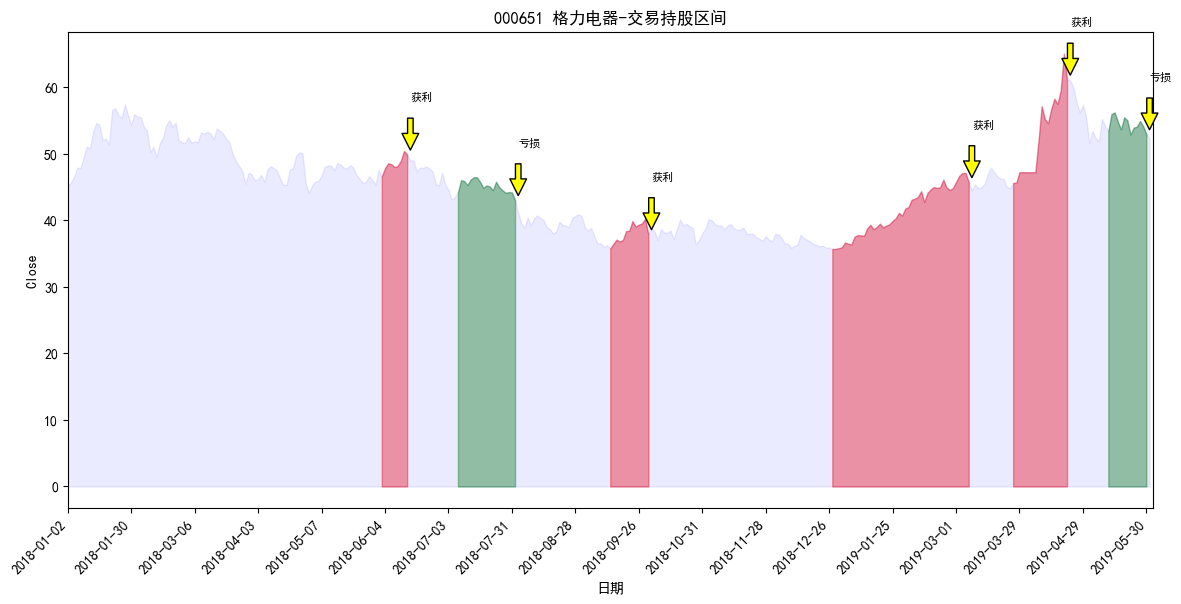

In [22]:
draw_trade_chart(get_trade_signal(df_stockload.copy(deep=True)))

### 交易概览信息的统计

In [23]:
def log_trade_info(stock_dat):

    signal_shift = stock_dat.Signal.shift(1)
    signal_shift.fillna(value=-1, inplace=True)  # 序列最前面的NaN值用-1填充
    list_signal = np.sign(stock_dat.Signal - signal_shift)

    buy_singal = stock_dat[list_signal.isin([1])]
    sell_singal = stock_dat[list_signal.isin([-1])]

    trade_info = pd.DataFrame({'BuyTime': buy_singal.index.strftime("%y.%m.%d"),
                               'SellTime': sell_singal.index.strftime("%y.%m.%d"),
                               'BuyPrice': buy_singal.Close.values,
                               'SellPrice': sell_singal.Close.values})

    trade_info['DiffPrice'] = trade_info.SellPrice - trade_info.BuyPrice
    trade_info['PctProfit'] = np.round(trade_info.DiffPrice/trade_info.BuyPrice*100, 2)

    win_count = (trade_info.DiffPrice >= 0).sum()
    loss_count = (trade_info.DiffPrice < 0).sum()
    win_profit = trade_info[trade_info.PctProfit >= 0].PctProfit.sum()
    loss_profit = trade_info[trade_info.PctProfit < 0].PctProfit.sum()

    # 临时把标准输出重定向到一个文件，然后再恢复正常
    with open('logtrade.txt', 'w', encoding='utf-8') as f:
        oldstdout = sys.stdout
        sys.stdout = f
        try:
            print(trade_info)
            
            #print(win_count,loss_count,win_profit,loss_profit)
            print(f'亏损次数:{loss_count}, 盈利次数:{win_count}, 胜率:{round(win_count / (win_count + loss_count)*100, 2)}%')
            print(f'平均亏损:{round((loss_profit / loss_count), 2)}% 平均盈利:{round((win_profit / win_count), 2)}%')

        finally:
            sys.stdout = oldstdout

In [24]:
log_trade_info(get_trade_signal(df_stockload.copy(deep=True)))

### 衡量策略资金的绝对收益与相对收益率

In [25]:
def draw_absolute_profit(stock_dat):

    cash_hold = 100000 # 初始资金
    posit_num = 0 # 持股数目
    skip_days = False # 持股/持币状态
    slippage = 0.01 # 滑点，默认为0.01
    c_rate = 5.0 / 10000  # 手续费，commission，默认万分之5
    t_rate = 1.0 / 1000  # 印花税，tax，默认千分之1

    # 绝对收益—资金的度量
    for kl_index, today in stock_dat.iterrows():
        # 买入/卖出执行代码
        if today.Signal == 1 and skip_days == False: # 买入
            skip_days = True
            posit_num = int(cash_hold / (today.Close + slippage)) # 资金转化为股票
            posit_num = int(posit_num / 100) * 100 # 买入股票最少100股，对posit_num向下取整百
            buy_cash = posit_num * (today.Close + slippage) # 计算买入股票所需现金
            # 计算手续费，不足5元按5元收，并保留2位小数
            commission = round(max(buy_cash * c_rate, 5), 2)
            cash_hold = cash_hold - buy_cash - commission
        elif today.Signal == -1 and skip_days == True: # 卖出，避免未买先卖
            skip_days = False
            sell_cash = posit_num * (today.Close - slippage) # 计算卖出股票得到的现金 卖出股票可以不是整百。
            # 计算手续费，不足5元按5元收，并保留2位小数
            commission = round(max(sell_cash * c_rate, 5), 2)
            # 计算印花税，保留2位小数
            tax = round(sell_cash * t_rate, 2)
            cash_hold = cash_hold + sell_cash - commission - tax # 剩余现金
        if skip_days == True: # 持股
            stock_dat.loc[kl_index,'total'] = posit_num * today.Close+ cash_hold
        else: # 空仓
            stock_dat.loc[kl_index,'total'] = cash_hold

    line_key = "资金总体收益%d；上涨幅度 %.2f%%" % (stock_dat['total'][-1], (stock_dat['total'][-1] - 100000) / 100000*100)
    print(line_key)

    layout_dict = {'figsize': (14, 5),
                   'index': stock_dat.index,
                   'draw_kind': {'line':
                                     {line_key: stock_dat.total
                                      }
                                 },
                   'title': u"000651 格力电器-资金总体收益",
                   'ylabel': u"总体收益",
                   'xlabel': u"日期",
                   'xticks': 20,
                   'legend': u'best',
                   'xticklabels': '%Y-%m-%d'
                   }
    app.fig_output(**layout_dict)

资金总体收益183669；上涨幅度 83.67%
输出[line]可视化图表:


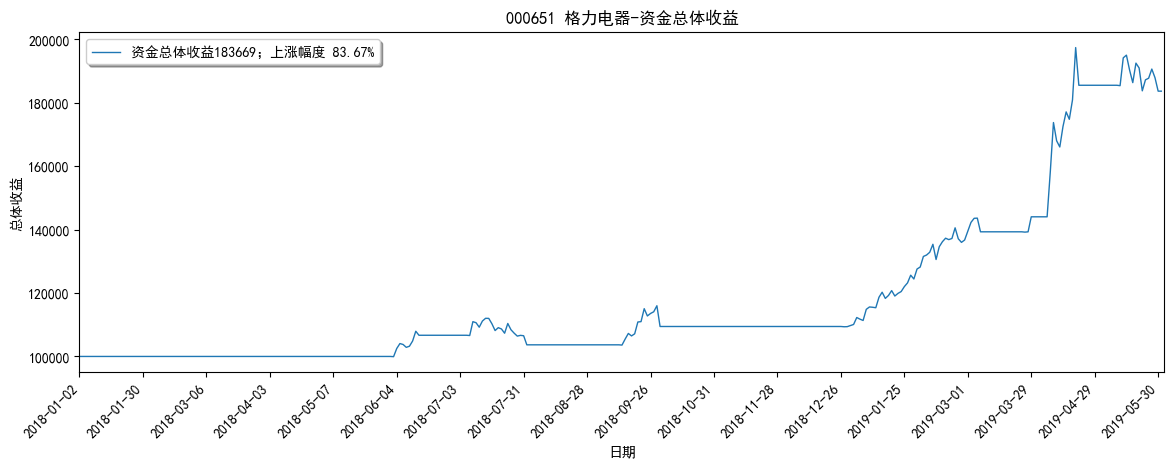

In [26]:
draw_absolute_profit(get_trade_signal(df_stockload.copy(deep=True)))

In [27]:
def draw_relative_profit(stock_dat):
    # 相对收益—策略VS基准
    pct_close = stock_dat['Close'].pct_change()
    # 交易信号与股票每日涨跌幅相乘，即可得策略的每日涨跌幅,累乘后计算策略累计收益 
    trend_profit_pct = (1 + stock_dat['Signal'] * pct_close).cumprod()
    # 把股票价格转换成从1开始，即波动的幅度 
    benchmark_profit_pct = stock_dat['Close']/stock_dat['Close'][0]

    stock_dat['benchmark_profit_log'] = np.log(stock_dat.Close/stock_dat.Close.shift(1))
    stock_dat.loc[stock_dat.Signal == -1, 'Signal'] = 0
    stock_dat['trend_profit_log'] = stock_dat['Signal'] * stock_dat.benchmark_profit_log
    line_trend_key = "策略收益%.2f" % (stock_dat['trend_profit_log'].cumsum()[-1])
    line_bench_key = "基准收益%.2f" % (stock_dat['benchmark_profit_log'].cumsum()[-1])

    print("资金相对收益：%s VS %s" % (line_trend_key, line_bench_key))

    layout_dict = {'figsize': (14, 5),
                   'index': stock_dat.index,
                   'draw_kind': {'line':
                                     {line_bench_key: stock_dat['benchmark_profit_log'].cumsum(),
                                      line_trend_key: stock_dat['trend_profit_log'].cumsum()
                                      #'benchmark_profit_pct': benchmark_profit_pct,
                                      #'trend_profit_pct': trend_profit_pct
                                      }
                                 },
                   'title': u"000651 格力电器-相对收益率",
                   'ylabel': u"相对收益率",
                   'xlabel': u"日期",
                   'xticks': 20,
                   'legend': u'best',
                   'xticklabels': '%Y-%m-%d'
                   }  # strftime
    app.fig_output(**layout_dict)

资金相对收益：策略收益0.82 VS 基准收益0.15
输出[line]可视化图表:


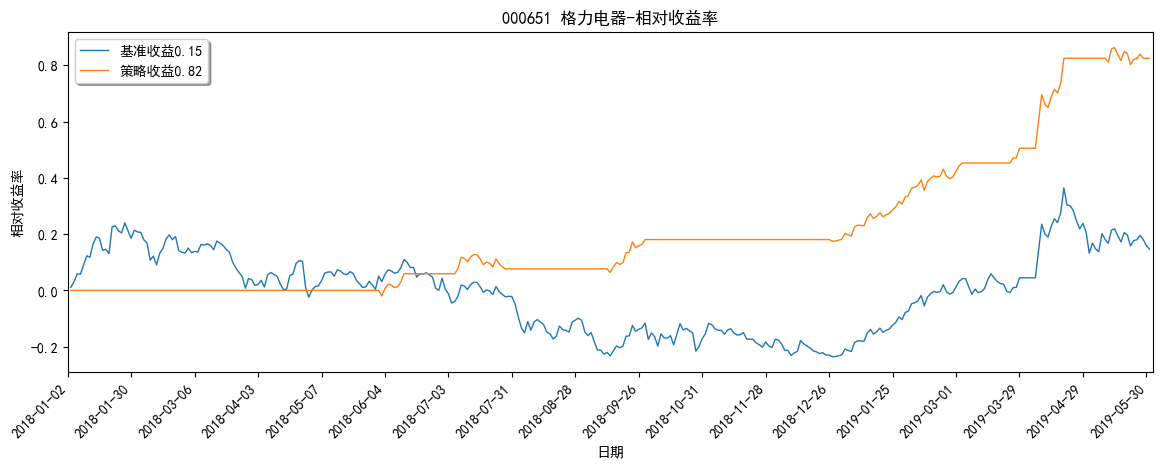

In [28]:
draw_relative_profit(get_trade_signal(df_stockload.copy(deep=True)))

### 度量策略的最大风险回撤

In [29]:
def draw_closemax_risk(stock_dat):
    # 度量策略最大风险回撤——收盘价最大回撤

    # 计算收盘价曲线当前的滚动最高值
    stock_dat['max_close'] = stock_dat['Close'].expanding().max()
    # 计算收盘价曲线在滚动最高值之后所回撤的百分比
    stock_dat['per_close'] = stock_dat['Close'] / stock_dat['max_close']

    # 寻找出收盘价最大回撤率交易日
    min_point_df = stock_dat.sort_values(by=['per_close'])[0:1]
    min_point_close = min_point_df.per_close
    #min_point_close = stock_dat.sort_values(by=['per_close']).iloc[[0], stock_dat.columns.get_loc('per_close')]

    # 寻找出收盘价最高值交易日
    max_point_df = stock_dat[stock_dat.index <= min_point_close.index[0]].sort_values(by=['Close'], ascending=False)[0:1]
    max_point_close = max_point_df.Close
    #max_point_close = stock_dat[stock_dat.index <= min_point_close.index[0]].sort_values \
    #    (by=['Close'], ascending=False).iloc[[0], stock_dat.columns.get_loc('Close')]

    # 打印收盘价的最大回撤率与所对应的最高值交易日和最大回撤交易日
    print("股价最大回撤%5.2f%% 从%s开始至%s结束" % ((1 - min_point_close.values)*100,\
                                        max_point_close.index[0], min_point_close.index[0]))
    

    layout_dict = {'figsize': (14, 5),
                   'index': stock_dat.index,
                   'draw_kind': {'line':
                                     {'最大收盘价': stock_dat.max_close,
                                      '收盘价': stock_dat.Close
                                      },
                                 'annotate':
                                     {u"股价最大回撤\n{}".format(1 - min_point_close.values):
                                          {'andata': min_point_df,
                                           'va':'top',
                                           'xy_y': 'Close',
                                           'xytext': (0, stock_dat['High'].mean()),
                                           'fontsize': 8,
                                           'arrow': dict(facecolor='green', shrink=0.1)
                                          },
                                      }
                                 },
                   'title': u"000651 格力电器-收盘价最大回撤",
                   'ylabel': u"收盘价最大回撤",
                   'xlabel': u"日期",
                   'xticks': 20,
                   'legend': u'best',
                   'xticklabels': '%Y-%m-%d'}
    app.fig_output(**layout_dict)

股价最大回撤37.84% 从2018-01-26 00:00:00开始至2018-12-27 00:00:00结束
输出[line]可视化图表:
输出[annotate]可视化图表:


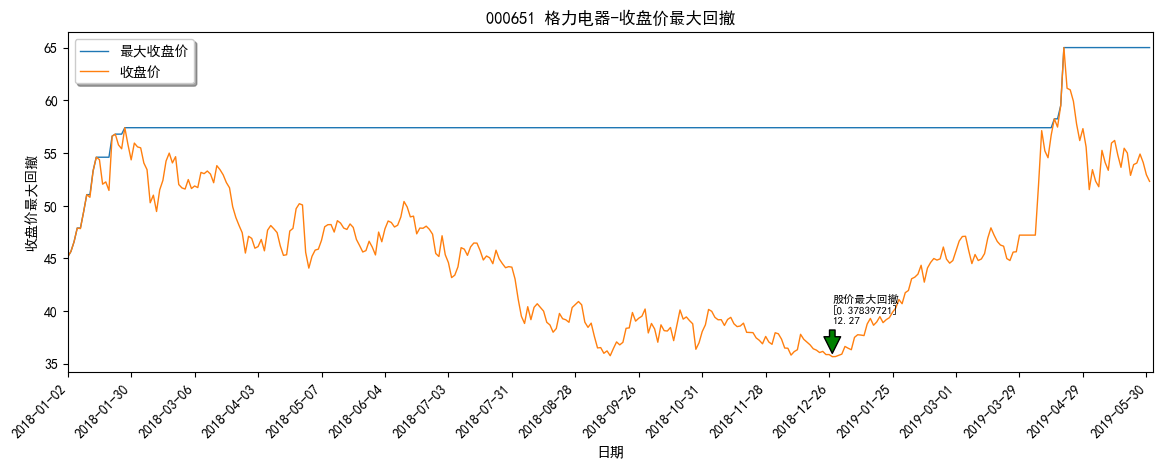

In [30]:
draw_closemax_risk(get_trade_signal(df_stockload.copy(deep=True)))

In [31]:
def draw_profitmax_risk(stock_dat):
    # 度量策略最大风险回撤——资金最大回撤
    cash_hold = 100000 # 初始资金
    posit_num = 0 # 持股数目
    skip_days = False # 持股/持币状态
    slippage = 0.01 # 滑点，默认为0.01
    c_rate = 5.0 / 10000  # 手续费，commission，默认万分之5
    t_rate = 1.0 / 1000  # 印花税，tax，默认千分之1

    # 绝对收益—资金的度量
    for kl_index, today in stock_dat.iterrows():
        # 买入/卖出执行代码
        if today.Signal == 1 and skip_days == False: #买入
            skip_days = True
            posit_num = int(cash_hold / (today.Close + slippage)) # 资金转化为股票
            posit_num = int(posit_num / 100) * 100  # 买入股票最少100股，对posit_num向下取整百
            buy_cash = posit_num * (today.Close + slippage) # 计算买入股票所需现金
            # 计算手续费，不足5元按5元收，并保留2位小数
            commission = round(max(buy_cash * c_rate, 5), 2)
            cash_hold = cash_hold - buy_cash - commission

        elif today.Signal == -1 and skip_days == True: # 卖出 避免未买先卖
            skip_days = False
            sell_cash = posit_num * (today.Close - slippage) # 计算卖出股票得到的现金 卖出股票可以不是整百。
            # 计算手续费，不足5元按5元收，并保留2位小数
            commission = round(max(sell_cash * c_rate, 5), 2)
            # 计算印花税，保留2位小数
            tax = round(sell_cash * t_rate, 2)
            cash_hold = cash_hold + sell_cash - commission - tax # 剩余现金

        if skip_days == True: # 持股
            stock_dat.loc[kl_index,'total'] = posit_num * today.Close + cash_hold
        else: # 空仓
            stock_dat.loc[kl_index,'total'] = cash_hold

        # expanding()计算资金曲线当前的滚动最高值
        stock_dat['max_total'] = stock_dat['total'].expanding().max()

        # 计算资金曲线在滚动最高值之后所回撤的百分比
        stock_dat['per_total'] = stock_dat['total'] / stock_dat['max_total']

    min_point_df = stock_dat.sort_values(by=['per_total'])[0:1]
    min_point_total = min_point_df.per_total
    max_point_df = stock_dat[stock_dat.index <= min_point_total.index[0]].sort_values(by=['total'], ascending=False)[0:1]
    max_point_total = max_point_df.total
    #min_point_total = stock_dat.sort_values(by=['per_total']).iloc[[0], stock_dat.columns.get_loc('per_total')]
    #max_point_total = stock_dat[stock_dat.index <= min_point_total.index[0]].sort_values \
    #    (by=['total'], ascending=False).iloc[[0], stock_dat.columns.get_loc('total')]

    print("资金最大回撤%5.2f%% 从%s开始至%s结束" % ((1 - min_point_total.values)*100, \
                                       max_point_total.index[0], min_point_total.index[0]))
    # 最大资金回撤 7.49%从2018-07-13 00:00:00开始至2018-09-12 00:00:00结束

   
    layout_dict = {'figsize': (14, 5),
                   'index': stock_dat.index,
                   'draw_kind': {'line':
                                     {'最大资金': stock_dat.max_total,
                                      '资金': stock_dat.total
                                      },
                                 'annotate':
                                     {u"资金最大回撤\n{}".format(1 - min_point_total.values):
                                          {'andata': min_point_df,
                                           'va':'top',
                                           'xy_y': 'total',
                                           'xytext': (0,stock_dat['High'].mean()),
                                           'fontsize': 8,
                                           'arrow': dict(facecolor='green', shrink=0.1)
                                          },
                                      }
                                 },
                   'title': u"000651 格力电器-资金最大回撤",
                   'ylabel': u"资金最大回撤",
                   'xlabel': u"日期",
                   'xticks': 20,
                   'legend': u'best',
                   'xticklabels': '%Y-%m-%d'}
    app.fig_output(**layout_dict)


资金最大回撤 7.53% 从2018-07-13 00:00:00开始至2018-09-12 00:00:00结束
输出[line]可视化图表:
输出[annotate]可视化图表:


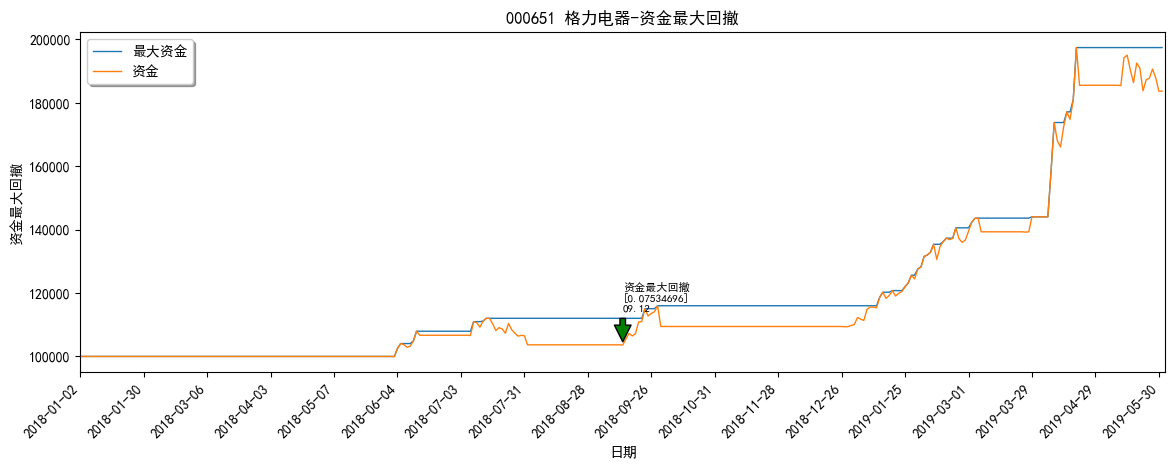

In [32]:
draw_profitmax_risk(get_trade_signal(df_stockload.copy(deep=True)))

In [33]:
class MultiTraceIf(MplTypesDraw):

    app = DefTypesPool()
    ##########################回测分析界面###############################
    @app.route_types(u"cash_profit")# cash profit and retracement
    def cash_profit_graph(stock_dat, sub_graph, cash_hold = 100000,
                                                slippage = 0.01,
                                                c_rate = 5.0 / 10000,
                                                t_rate = 1.0 / 1000):
        posit_num = 0  # 持股数目
        skip_days = False  # 持股/持币状态

        # 最大风险回撤——资金最大回撤
        # 绝对收益—资金的度量
        for kl_index, today in stock_dat.iterrows():
            # 买入/卖出执行代码
            if today.Signal == 1 and skip_days == False:  # 买入
                skip_days = True
                posit_num = int(cash_hold / (today.Close + slippage))  # 资金转化为股票
                posit_num = int(posit_num / 100) * 100  # 买入股票最少100股，对posit_num向下取整百
                buy_cash = posit_num * (today.Close + slippage)  # 计算买入股票所需现金
                # 计算手续费，不足5元按5元收，并保留2位小数
                commission = round(max(buy_cash * c_rate, 5), 2)
                cash_hold = cash_hold - buy_cash - commission

            elif today.Signal == -1 and skip_days == True:  # 卖出 避免未买先卖
                skip_days = False
                sell_cash = posit_num * (today.Close - slippage) # 计算卖出股票得到的现金 卖出股票可以不是整百。
                # 计算手续费，不足5元按5元收，并保留2位小数
                commission = round(max(sell_cash * c_rate, 5), 2)
                # 计算印花税，保留2位小数
                tax = round(sell_cash * t_rate, 2)
                cash_hold = cash_hold + sell_cash - commission - tax # 剩余现金
            if skip_days == True:  # 持股
                stock_dat.loc[kl_index, 'total'] = posit_num * today.Close + cash_hold
            else:  # 空仓
                stock_dat.loc[kl_index, 'total'] = cash_hold

            # expanding()计算资金曲线当前的滚动最高值
            stock_dat['max_total'] = stock_dat['total'].expanding().max()
            # 计算资金曲线在滚动最高值之后所回撤的百分比
            stock_dat['per_total'] = stock_dat['total'] / stock_dat['max_total']

        min_point_df = stock_dat.sort_values(by=['per_total'])[0:1]
        min_point_total = min_point_df.per_total
        max_point_df = stock_dat[stock_dat.index <= min_point_total.index[0]].sort_values(by=['total'],
                                                                                          ascending=False)[0:1]
        max_point_total = max_point_df.total
        # min_point_total = stock_dat.sort_values(by=['per_total']).iloc[[0], stock_dat.columns.get_loc('per_total')]
        # max_point_total = stock_dat[stock_dat.index <= min_point_total.index[0]].sort_values \
        #    (by=['total'], ascending=False).iloc[[0], stock_dat.columns.get_loc('total')]

        print("资金最大回撤%5.2f%% 从%s开始至%s结束" % ((1 - min_point_total.values) * 100, \
                                            max_point_total.index[0], min_point_total.index[0]))
        # 最大资金回撤 7.53%从2018-07-13 00:00:00开始至2018-09-12 00:00:00结束

        line_total = "资金总体收益%d；上涨幅度 %.2f%%" % (stock_dat['total'][-1], (stock_dat['total'][-1] - 100000) / 100000 * 100)
        print(line_total)
        max_total = "资金滚动最高值"

        type_dict = {line_total: stock_dat.total,
                     max_total: stock_dat.max_total,
                     }
        view_function = MplTypesDraw.mpl.route_output(u"line")
        view_function(stock_dat.index, type_dict, sub_graph)

        type_dict = {u"资金最大回撤\n{}".format(1 - min_point_total.values):
                         {'andata': min_point_df,
                          'va': 'top',
                          'xy_y': 'total',
                          'xytext': (0,stock_dat['High'].mean()),
                          'fontsize': 8,
                          'arrow': dict(facecolor='green', shrink=0.1)
                          },
                      }
        view_function = MplTypesDraw.mpl.route_output(u"annotate")
        view_function(stock_dat.index, type_dict, sub_graph)

    @app.route_types(u"cmp_profit")  # relative_profit
    def cmp_profit_graph(stock_dat, sub_graph, para_dat):

        # 相对收益—策略VS基准
        stock_dat['benchmark_profit_log'] = np.log(stock_dat.Close / stock_dat.Close.shift(1))
        stock_dat.loc[stock_dat.Signal == -1, 'Signal'] = 0
        stock_dat['trend_profit_log'] = stock_dat['Signal'] * stock_dat.benchmark_profit_log
        line_trend_key = "策略收益%.2f" % stock_dat['trend_profit_log'].cumsum()[-1]
        line_bench_key = "基准收益%.2f" % stock_dat['benchmark_profit_log'].cumsum()[-1]
        print("资金相对收益：%s VS %s" % (line_trend_key, line_bench_key))

        type_dict = {line_bench_key: stock_dat['benchmark_profit_log'].cumsum(),
                     line_trend_key: stock_dat['trend_profit_log'].cumsum()
                     }
        view_function = MplTypesDraw.mpl.route_output(u"line")
        view_function(stock_dat.index, type_dict, sub_graph)

    @app.route_types(u"close_retrace")  # relative_profit
    def close_retrace_graph(stock_dat, sub_graph, para_dat):
        # 度量策略最大风险回撤——收盘价最大回撤

        # 计算收盘价曲线当前的滚动最高值
        stock_dat['max_close'] = stock_dat['Close'].expanding().max()
        # 计算收盘价曲线在滚动最高值之后所回撤的百分比
        stock_dat['per_close'] = stock_dat['Close'] / stock_dat['max_close']

        # 计算并打印收盘价的最大回撤率
        min_point_df = stock_dat.sort_values(by=['per_close'])[0:1]
        min_point_close = min_point_df.per_close
        # min_point_close = stock_dat.sort_values(by=['per_close']).iloc[[0], stock_dat.columns.get_loc('per_close')]

        # 寻找出最大回撤率所对应的最高值交易日和最大回撤交易日，并打印显示
        max_point_df = stock_dat[stock_dat.index <= min_point_close.index[0]].sort_values(by=['Close'],
                                                                                          ascending=False)[0:1]
        max_point_close = max_point_df.Close
        # max_point_close = stock_dat[stock_dat.index <= min_point_close.index[0]].sort_values \
        #    (by=['Close'], ascending=False).iloc[[0], stock_dat.columns.get_loc('Close')]

        print("股价最大回撤%5.2f%% 从%s开始至%s结束" % ((1 - min_point_close.values) * 100, \
                                            max_point_close.index[0], min_point_close.index[0]))
        ##最大股价回撤 29.21% 从2018-06-12 00:00:00开始至2018-12-27 00:00:00结束

        type_dict = {'最大收盘价': stock_dat.max_close,
                     '收盘价': stock_dat.Close
                     }
        view_function = MplTypesDraw.mpl.route_output(u"line")
        view_function(stock_dat.index, type_dict, sub_graph)

        type_dict = {u"股价最大回撤\n{}".format(1 - min_point_close.values):
                               {'andata': min_point_df,
                                'va': 'top',
                                'xy_y': 'Close',
                                'xytext': (0,stock_dat['High'].mean()),
                                'fontsize': 8,
                                'arrow': dict(facecolor='green', shrink=0.1)
                                },
                    }
        view_function = MplTypesDraw.mpl.route_output(u"annotate")
        view_function(stock_dat.index, type_dict, sub_graph)

    @app.route_types(u"trade")
    def trade_graph(stock_dat, sub_graph, para_dat):
        # 交易获利/亏损区间可视化

        type_dict = {'signal': stock_dat.Signal,
                     'jdval': stock_dat.Close,
                     'va': 'top',
                     'xy_y': 'Close',
                     'xytext': (0,stock_dat['High'].mean()),
                     'fontsize': 8,
                     'arrow': dict(facecolor='yellow', shrink=0.1)
                     }
        view_function = MplTypesDraw.mpl.route_output(u"filltrade")
        view_function(stock_dat.index, type_dict, sub_graph)

    def __init__(self, **kwargs):
        MplTypesDraw.__init__(self)
        self.fig = plt.figure(figsize=kwargs['figsize'], dpi=100, facecolor="white")#创建fig对象
        self.graph_dict = {}
        self.graph_curr = []

        try:
            gs = gridspec.GridSpec(kwargs['nrows'], kwargs['ncols'],
                                   left = kwargs['left'], bottom = kwargs['bottom'], right = kwargs['right'], top = kwargs['top'],
                                   wspace = kwargs['wspace'], hspace = kwargs['hspace'], height_ratios = kwargs['height_ratios'])
        except:
            raise Exception("para error")
        else:
            for i in range(0, kwargs['nrows'], 1):
                self.graph_dict[kwargs['subplots'][i]] = self.fig.add_subplot(gs[i, :])

    def log_trade_info(self, stock_dat):

        signal_shift = stock_dat.Signal.shift(1)
        signal_shift.fillna(value=-1, inplace=True)  # 序列最前面的NaN值用-1填充
        list_signal = np.sign(stock_dat.Signal - signal_shift)

        buy_singal = stock_dat[list_signal.isin([1])]
        sell_singal = stock_dat[list_signal.isin([-1])]

        trade_info = pd.DataFrame({'BuyTime': buy_singal.index.strftime("%y.%m.%d"),
                                   'SellTime': sell_singal.index.strftime("%y.%m.%d"),
                                   'BuyPrice': buy_singal.Close.values,
                                   'SellPrice': sell_singal.Close.values})

        trade_info['DiffPrice'] = trade_info.SellPrice - trade_info.BuyPrice
        trade_info['PctProfit'] = np.round(trade_info.DiffPrice / trade_info.BuyPrice*100, 2)

        win_count = (trade_info.DiffPrice >= 0).sum()
        loss_count = (trade_info.DiffPrice < 0).sum()
        win_profit = trade_info[trade_info.PctProfit >= 0].PctProfit.sum()
        loss_profit = trade_info[trade_info.PctProfit < 0].PctProfit.sum()

        print(trade_info)
        print(f'亏损次数:{loss_count}, 盈利次数:{win_count}, 胜率:{round(win_count / (win_count + loss_count)*100, 2)}%')
        print(f'平均亏损:{round((loss_profit / loss_count), 2)}% 平均盈利:{round((win_profit / win_count), 2)}%')

    def graph_run(self, stock_data, **kwargs):
        # 绘制子图
        self.df_ohlc = stock_data

        # 临时把标准输出重定向到一个文件，然后再恢复正常
        with open('logtrade.txt', 'w', encoding='utf-8') as f:
            oldstdout = sys.stdout
            sys.stdout = f
            try:
                self.log_trade_info(self.df_ohlc)
                for key in kwargs:
                    self.graph_curr = self.graph_dict[kwargs[key]['graph_name']]
                    for path, val in kwargs[key]['graph_type'].items():
                        view_function = MultiTraceIf.app.route_output(path)
                        view_function(self.df_ohlc, self.graph_curr, val)
                    self.graph_attr(**kwargs[key])
                plt.show()
            finally:
                sys.stdout = oldstdout

        """
        print("kwargs %s-->%s" % (key, kwargs[key]))
        #globals().get('self.%s' % key)(**kwargs[key])
        eval('self.%s' % key)()
        #self.kline_draw(**kwargs[key])
        """

    def graph_attr(self, **kwargs):

        if 'title' in kwargs.keys():
            self.graph_curr.set_title(kwargs['title'])

        if 'legend' in kwargs.keys():
            self.graph_curr.legend(loc=kwargs['legend'], shadow=True)

        if 'xlabel' in kwargs.keys():
            self.graph_curr.set_xlabel(kwargs['xlabel'])

        self.graph_curr.set_ylabel(kwargs['ylabel'])
        self.graph_curr.set_xlim(0, len(self.df_ohlc.index))  # 设置一下x轴的范围
        self.graph_curr.set_xticks(range(0, len(self.df_ohlc.index), kwargs['xticks']))  # X轴刻度设定 每15天标一个日期

        if 'xticklabels' in kwargs.keys():
            self.graph_curr.set_xticklabels(
                [self.df_ohlc.index.strftime(kwargs['xticklabels'])[index] for index in
                 self.graph_curr.get_xticks()])  # 标签设置为日期

            # X-轴每个ticker标签都向右倾斜45度
            for label in self.graph_curr.xaxis.get_ticklabels():
                label.set_rotation(45)
                label.set_fontsize(10)  # 设置标签字体
        else:
            for label in self.graph_curr.xaxis.get_ticklabels():
                label.set_visible(False)


In [34]:
layout_dict = {'figsize': (14, 8),
                'nrows': 3,
                'ncols': 1,
                'left': 0.08,
                'bottom': 0.15,
                'right': 0.95,
                'top': 0.95,
                'wspace': None,
                'hspace': 0,
                'height_ratios': [1.5, 1, 1],
                'subplots': ['kgraph', 'cashgraph', 'cmppfgraph']}

subplots_dict = {'graph_fst': {'graph_name': 'kgraph',
                                'graph_type': {'trade': None,
                                                'close_retrace': None
                                                },
                                'title': u"000651 格力电器-回测分析",
                                'ylabel': u"价格",
                                'xticks': 15,
                                'legend': 'best'
                                },
                    'graph_sec': {'graph_name': 'cashgraph',
                                'graph_type': {'cash_profit': 100000  # 初始资金
                                                },
                                'ylabel': u"资金收益和回撤",
                                'xticks': 15,
                                'legend': 'best',
                                },
                    'graph_fth': {'graph_name': 'cmppfgraph',
                                'graph_type': {'cmp_profit': None
                                                },
                                'ylabel': u"策略收益VS基准收益",
                                'xlabel': u"日期",
                                'xticks': 15,
                                'legend': 'best',
                                'xticklabels': '%Y-%m-%d'
                                },
                    }
        

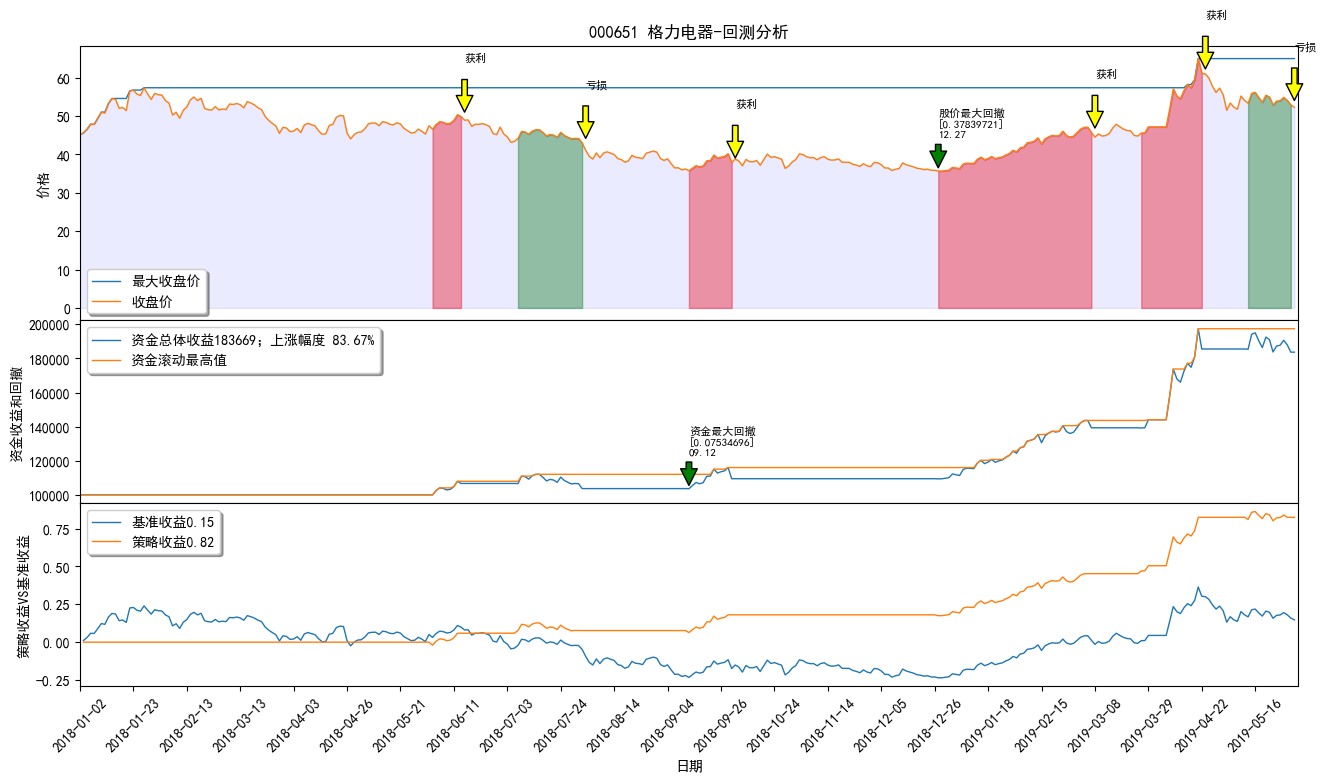

In [35]:
draw_stock = MultiTraceIf(**layout_dict)
draw_stock.graph_run(get_trade_signal(df_stockload.copy(deep=True)), **subplots_dict)

## 经典择时策略进阶之股票量化交易

### 唐奇安通道突破策略

In [36]:
stock_dat = bs_k_daily_stock('000651', '2018-01-01', '2019-06-01')

login success!
logout success!


In [37]:
stock_dat['N1_High'] = stock_dat.High.rolling(window=15).max() # 计算最近N1个交易日最高价
stock_dat

,Open,Close,High,Low,Volume,N1_High
date,,,,,,
2018-01-02,44.20,45.15,45.20,44.18,587146.42,NaN
2018-01-03,45.30,45.65,46.46,45.20,794304.89,NaN
2018-01-04,46.00,46.58,46.58,45.73,640485.24,NaN
2018-01-05,46.80,47.88,47.95,46.31,781865.80,NaN
2018-01-08,48.17,47.83,48.95,47.30,788630.47,NaN
...,...,...,...,...,...,...
2019-05-27,54.01,54.05,54.50,52.98,352294.27,56.58
2019-05-28,54.00,54.90,55.33,53.80,399621.73,56.58
2019-05-29,54.13,54.10,54.66,53.70,295262.21,56.58


In [38]:
expan_max = stock_dat.High.expanding().max() # 滚动计算当前交易日为止的最大值
expan_max

date
2018-01-02    45.20
2018-01-03    46.46
2018-01-04    46.58
2018-01-05    47.95
2018-01-08    48.95
              ...  
2019-05-27    65.40
2019-05-28    65.40
2019-05-29    65.40
2019-05-30    65.40
2019-05-31    65.40
Name: High, Length: 342, dtype: float64

In [39]:
stock_dat['N1_High'].fillna(value=expan_max,inplace=True) # 填充前N1个nan
stock_dat

,Open,Close,High,Low,Volume,N1_High
date,,,,,,
2018-01-02,44.20,45.15,45.20,44.18,587146.42,45.20
2018-01-03,45.30,45.65,46.46,45.20,794304.89,46.46
2018-01-04,46.00,46.58,46.58,45.73,640485.24,46.58
2018-01-05,46.80,47.88,47.95,46.31,781865.80,47.95
2018-01-08,48.17,47.83,48.95,47.30,788630.47,48.95
...,...,...,...,...,...,...
2019-05-27,54.01,54.05,54.50,52.98,352294.27,56.58
2019-05-28,54.00,54.90,55.33,53.80,399621.73,56.58
2019-05-29,54.13,54.10,54.66,53.70,295262.21,56.58


In [40]:
stock_dat['N2_Low'] = stock_dat.Low.rolling(window=5).min() # 计算最近N2个交易日最低价
expan_min = stock_dat.Low.expanding().min()
stock_dat['N2_Low'].fillna(value=expan_min,inplace=True) # 目前出现过的最小值填充前N2个nan
stock_dat

,Open,Close,High,Low,Volume,N1_High,N2_Low
date,,,,,,,
2018-01-02,44.20,45.15,45.20,44.18,587146.42,45.20,44.18
2018-01-03,45.30,45.65,46.46,45.20,794304.89,46.46,44.18
2018-01-04,46.00,46.58,46.58,45.73,640485.24,46.58,44.18
2018-01-05,46.80,47.88,47.95,46.31,781865.80,47.95,44.18
2018-01-08,48.17,47.83,48.95,47.30,788630.47,48.95,44.18
...,...,...,...,...,...,...,...
2019-05-27,54.01,54.05,54.50,52.98,352294.27,56.58,52.88
2019-05-28,54.00,54.90,55.33,53.80,399621.73,56.58,52.88
2019-05-29,54.13,54.10,54.66,53.70,295262.21,56.58,52.88


In [41]:
buy_index = stock_dat[stock_dat.Close > stock_dat.N1_High.shift(1)].index
sell_index = stock_dat[stock_dat.Close < stock_dat.N2_Low.shift(1)].index

In [42]:
buy_index

DatetimeIndex(['2018-01-03', '2018-01-04', '2018-01-05', '2018-01-09',
               '2018-01-10', '2018-01-12', '2018-01-15', '2018-01-22',
               '2018-01-23', '2018-01-26', '2018-04-23', '2018-04-24',
               '2018-06-11', '2018-06-12', '2018-09-21', '2018-09-28',
               '2019-01-15', '2019-01-16', '2019-01-28', '2019-01-31',
               '2019-02-01', '2019-02-11', '2019-02-13', '2019-02-14',
               '2019-02-19', '2019-02-25', '2019-03-04', '2019-03-18',
               '2019-04-09', '2019-04-10', '2019-04-18', '2019-04-19'],
              dtype='datetime64[ns]', name='date', freq=None)

In [43]:
stock_dat.loc[buy_index, 'Signal'] = 1
stock_dat.loc[sell_index,'Signal'] = -1

In [44]:
stock_dat

,Open,Close,High,Low,Volume,N1_High,N2_Low,Signal
date,,,,,,,,
2018-01-02,44.20,45.15,45.20,44.18,587146.42,45.20,44.18,NaN
2018-01-03,45.30,45.65,46.46,45.20,794304.89,46.46,44.18,1.0
2018-01-04,46.00,46.58,46.58,45.73,640485.24,46.58,44.18,1.0
2018-01-05,46.80,47.88,47.95,46.31,781865.80,47.95,44.18,1.0
2018-01-08,48.17,47.83,48.95,47.30,788630.47,48.95,44.18,NaN
...,...,...,...,...,...,...,...,...
2019-05-27,54.01,54.05,54.50,52.98,352294.27,56.58,52.88,NaN
2019-05-28,54.00,54.90,55.33,53.80,399621.73,56.58,52.88,NaN
2019-05-29,54.13,54.10,54.66,53.70,295262.21,56.58,52.88,NaN


In [45]:
stock_dat['Signal'] = stock_dat.Signal.shift(1)

In [46]:
stock_dat

,Open,Close,High,Low,Volume,N1_High,N2_Low,Signal
date,,,,,,,,
2018-01-02,44.20,45.15,45.20,44.18,587146.42,45.20,44.18,NaN
2018-01-03,45.30,45.65,46.46,45.20,794304.89,46.46,44.18,NaN
2018-01-04,46.00,46.58,46.58,45.73,640485.24,46.58,44.18,1.0
2018-01-05,46.80,47.88,47.95,46.31,781865.80,47.95,44.18,1.0
2018-01-08,48.17,47.83,48.95,47.30,788630.47,48.95,44.18,1.0
...,...,...,...,...,...,...,...,...
2019-05-27,54.01,54.05,54.50,52.98,352294.27,56.58,52.88,NaN
2019-05-28,54.00,54.90,55.33,53.80,399621.73,56.58,52.88,NaN
2019-05-29,54.13,54.10,54.66,53.70,295262.21,56.58,52.88,NaN


In [47]:
stock_dat['Signal'].fillna(method = 'ffill', inplace = True) # 与前面元素值保持一致
stock_dat['Signal'].fillna(value = -1, inplace = True) # 序列最前面几个NaN值用-1填充

In [48]:
stock_dat

,Open,Close,High,Low,Volume,N1_High,N2_Low,Signal
date,,,,,,,,
2018-01-02,44.20,45.15,45.20,44.18,587146.42,45.20,44.18,-1.0
2018-01-03,45.30,45.65,46.46,45.20,794304.89,46.46,44.18,-1.0
2018-01-04,46.00,46.58,46.58,45.73,640485.24,46.58,44.18,1.0
2018-01-05,46.80,47.88,47.95,46.31,781865.80,47.95,44.18,1.0
2018-01-08,48.17,47.83,48.95,47.30,788630.47,48.95,44.18,1.0
...,...,...,...,...,...,...,...,...
2019-05-27,54.01,54.05,54.50,52.98,352294.27,56.58,52.88,-1.0
2019-05-28,54.00,54.90,55.33,53.80,399621.73,56.58,52.88,-1.0
2019-05-29,54.13,54.10,54.66,53.70,295262.21,56.58,52.88,-1.0


In [49]:
def get_ndays_signal(stock_dat, N1 = 15, N2 = 5):
    # 海龟策略-唐奇安通道突破(N日突破) 买入/卖出信号
    stock_dat['N1_High'] = stock_dat.High.rolling(window=N1).max() # 计算最近N1个交易日最高价
    expan_max = stock_dat.High.expanding().max() # 滚动计算当前交易日为止的最大值
    stock_dat['N1_High'].fillna(value=expan_max,inplace=True) # 填充前N1个nan
    


    stock_dat['N2_Low'] = stock_dat.Low.rolling(window=N2).min() # 计算最近N2个交易日最低价
    expan_min = stock_dat.Low.expanding().min()
    stock_dat['N2_Low'].fillna(value=expan_min,inplace=True) # 目前出现过的最小值填充前N2个nan
    
    # 收盘价超过N1最高价 买入股票
    buy_index = stock_dat[stock_dat.Close > stock_dat.N1_High.shift(1)].index
    # 收盘价超过N2最低价 卖出股票
    sell_index = stock_dat[stock_dat.Close < stock_dat.N2_Low.shift(1)].index

    stock_dat.loc[buy_index, 'Signal'] = 1
    stock_dat.loc[sell_index,'Signal'] = -1

    stock_dat['Signal'] = stock_dat.Signal.shift(1)
    #print(stock_dat[stock_dat['signal'].notna()])
    stock_dat['Signal'].fillna(method = 'ffill', inplace = True) # 与前面元素值保持一致
    stock_dat['Signal'].fillna(value = -1, inplace = True) # 序列最前面几个NaN值用-1填充
    return stock_dat

In [50]:
stock_data = bs_k_daily_stock('000651', '2018-01-01', '2019-06-01')

login success!
logout success!


In [51]:
get_ndays_signal(stock_data, N1 = 15, N2 = 5)

,Open,Close,High,Low,Volume,N1_High,N2_Low,Signal
date,,,,,,,,
2018-01-02,44.20,45.15,45.20,44.18,587146.42,45.20,44.18,-1.0
2018-01-03,45.30,45.65,46.46,45.20,794304.89,46.46,44.18,-1.0
2018-01-04,46.00,46.58,46.58,45.73,640485.24,46.58,44.18,1.0
2018-01-05,46.80,47.88,47.95,46.31,781865.80,47.95,44.18,1.0
2018-01-08,48.17,47.83,48.95,47.30,788630.47,48.95,44.18,1.0
...,...,...,...,...,...,...,...,...
2019-05-27,54.01,54.05,54.50,52.98,352294.27,56.58,52.88,-1.0
2019-05-28,54.00,54.90,55.33,53.80,399621.73,56.58,52.88,-1.0
2019-05-29,54.13,54.10,54.66,53.70,295262.21,56.58,52.88,-1.0


In [52]:
def draw_ndays_annotate(stock_dat):

    # 绘制唐奇安通道突破/N日突破
    signal_shift = stock_dat.Signal.shift(1)
    signal_shift.fillna(value=-1, inplace=True)  # 序列最前面的NaN值用-1填充
    list_signal = np.sign(stock_dat.Signal - signal_shift) # 计算买卖点

    down_cross = stock_dat[list_signal < 0]
    up_cross = stock_dat[list_signal > 0]

    #print(f'Buy-Time: \n {up_cross}')
    #print(f'Sell-Time: \n {down_cross}')

    layout_dict = {'figsize': (14, 7),
                   'index': stock_dat.index,
                   'draw_kind': {'ochl':
                                     {'Open': stock_dat.Open,
                                      'Close': stock_dat.Close,
                                      'High': stock_dat.High,
                                      'Low': stock_dat.Low
                                      },
                                 'line':
                                     {'N1_High': stock_dat.N1_High,
                                      'N2_Low': stock_dat.N2_Low
                                      },
                                 'annotate':
                                     {u'down':
                                          {'andata': down_cross,
                                           'va': 'top',
                                           'xy_y': 'N2_Low',
                                           'xytext': (-10, -stock_dat['Close'].mean()),
                                           'fontsize': 8,
                                           'arrow': dict(facecolor='green', shrink=0.1)
                                           },
                                      u'up':
                                          {'andata': up_cross,
                                           'va': 'bottom',
                                           'xy_y': 'N1_High',
                                           'xytext': (-10,stock_dat['Close'].mean()),
                                           'fontsize': 8,
                                           'arrow': dict(facecolor='red', shrink=0.1)
                                           }
                                      }
                                 },
                   'title': u"000651 格力电器-唐奇安通道突破",
                   'ylabel': u"价格",
                   'xlabel': u"日期",
                   'xticks': 15,
                   'legend': u'best',
                   'xticklabel': '%Y-%m-%d'}  # strftime
    app.fig_output(**layout_dict)


输出[ochl]可视化图表:
输出[line]可视化图表:
输出[annotate]可视化图表:


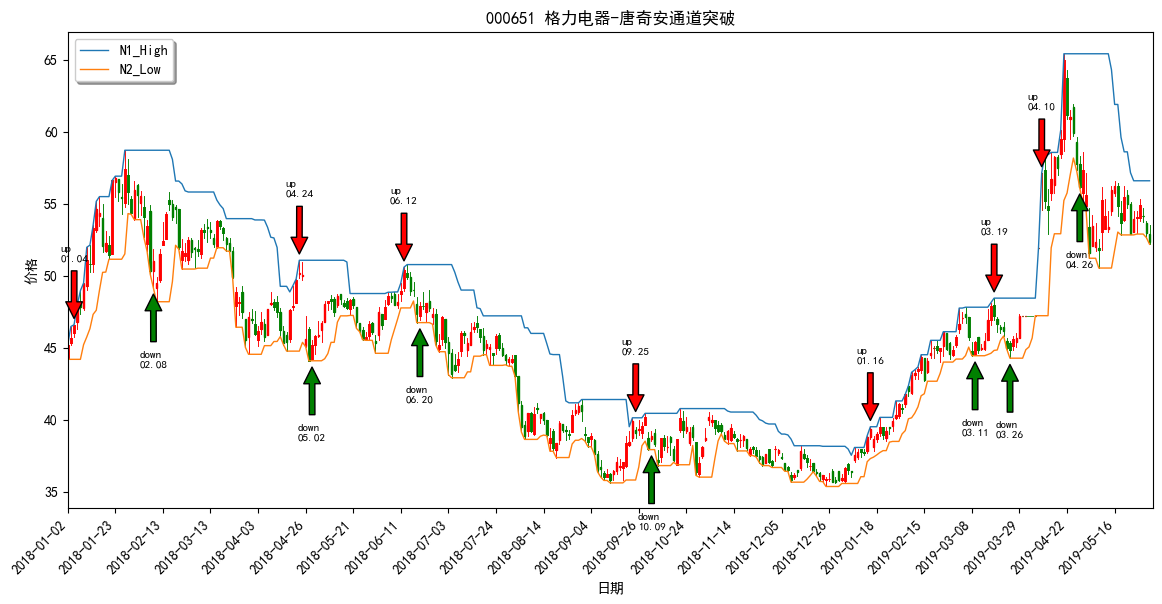

In [53]:
draw_ndays_annotate(stock_data.copy(deep=True))

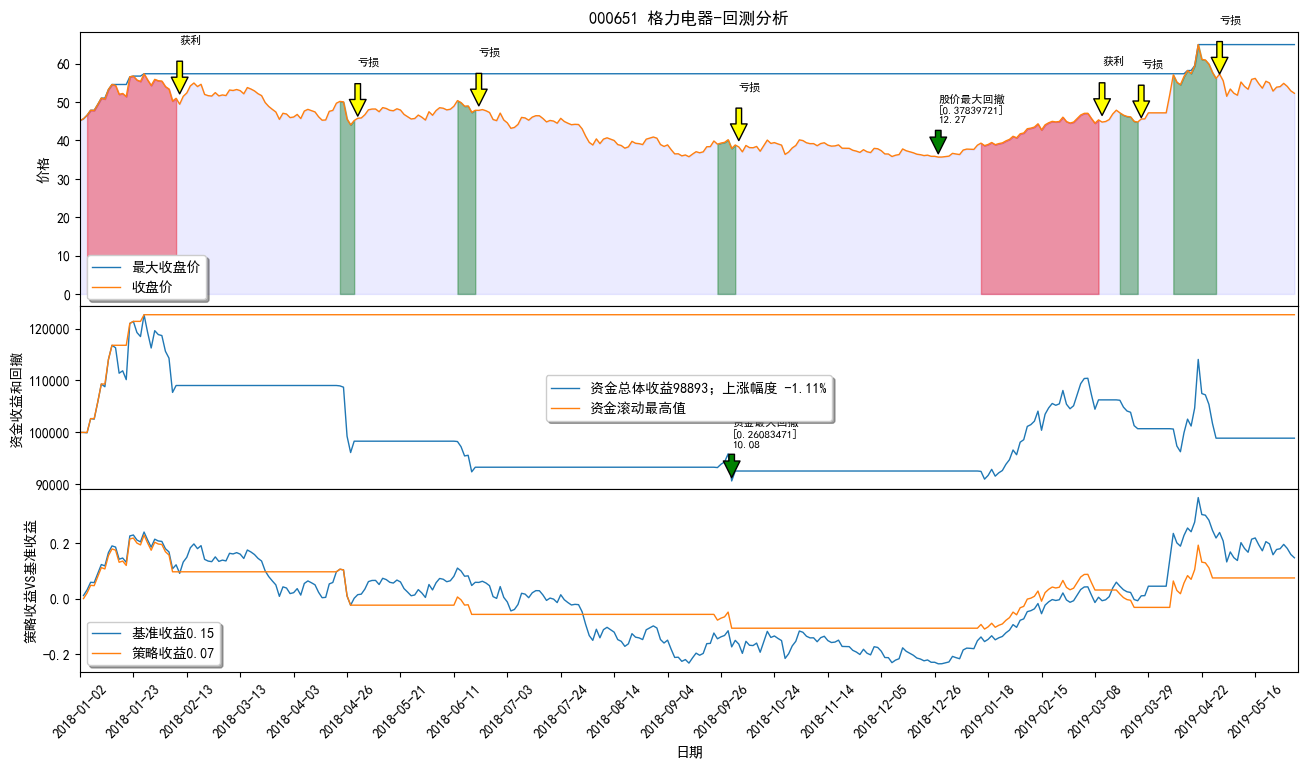

In [54]:
draw_stock = MultiTraceIf(**layout_dict)
draw_stock.graph_run(stock_data, **subplots_dict)

## 融入ATR跟踪止盈/止损策略

In [55]:
def draw_atr_chart(stock_dat):

    stock_dat['atr14'] = talib.ATR(stock_dat.High.values, stock_dat.Low.values, stock_dat.Close.values,
                                    timeperiod=14)  # 计算ATR14
    stock_dat['atr21'] = talib.ATR(stock_dat.High.values, stock_dat.Low.values, stock_dat.Close.values,
                                    timeperiod=21)  # 计算ATR21
    layout_dict = {'figsize': (14, 5),
                   'index': stock_dat.index,
                   'draw_kind': {'line':
                                     {'atr14': stock_dat.atr14,
                                      'atr21': stock_dat.atr21
                                      },
                                 },
                     'title': u"000651 格力电器-ATR",
                     'ylabel': u"波动幅度",
                     'xlabel': u"日期",
                     'xticks': 15,
                     'legend': u'best',
                     'xticklabel': '%Y-%m-%d'}  # strftime
    app.fig_output(**layout_dict)

输出[line]可视化图表:


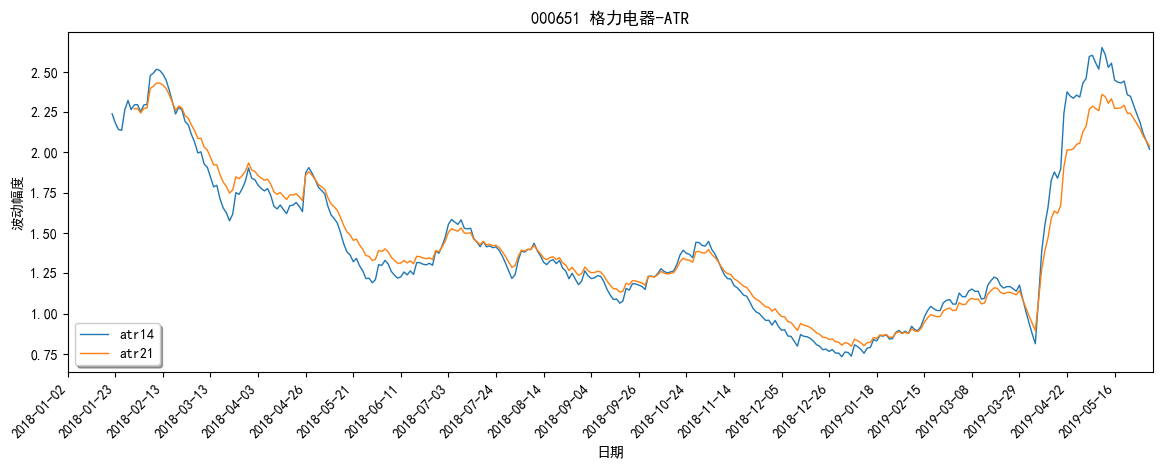

In [56]:
draw_atr_chart(stock_data)

- 当n_win * ATR值<(今日收盘价格-买入价格)，触发止盈信号，卖出股票
- 当n_loss * ATR值<(买入价格-今日收盘价格)，触发止损信号，卖出股票

In [57]:
def get_ndays_atr_signal(stock_dat, N1=15, N2=5, n_win=3.4, n_loss=1.8):
    # 海龟策略-唐奇安通道突破(N日突破) 买入/卖出信号
    stock_dat['N1_High'] = stock_dat.High.rolling(window=N1).max()  # 计算最近N1个交易日最高价
    expan_max = stock_dat.High.expanding().max()  # 滚动计算当前交易日为止的最大值
    stock_dat['N1_High'].fillna(value=expan_max, inplace=True)  # 填充前N1个nan
    stock_dat['N2_Low'] = stock_dat.Low.rolling(window=N2).min()  # 计算最近N2个交易日最低价
    expan_min = stock_dat.Low.expanding().min()
    stock_dat['N2_Low'].fillna(value=expan_min, inplace=True)  # 目前出现过的最小值填充前N2个nan

    stock_dat['ATR21'] = talib.ATR(stock_dat.High.values, stock_dat.Low.values, stock_dat.Close.values,
                                    timeperiod=21)  # 计算ATR21
    # 收盘价超过N1最高价 买入股票
    buy_index = stock_dat[stock_dat.Close > stock_dat.N1_High.shift(1)].index
    # 收盘价超过N2最低价 卖出股票
    sell_index = stock_dat[stock_dat.Close < stock_dat.N2_Low.shift(1)].index

    stock_dat.loc[buy_index, 'Signal'] = 1
    stock_dat.loc[sell_index, 'Signal'] = -1
    stock_dat['Signal'] = stock_dat.Signal.shift(1)

    buy_price = 0

    for kl_index, today in stock_dat.iterrows():
        #if today.Close > today.N1_High:
        if (buy_price == 0) and (today.Signal == 1):
            buy_price = today.Close
            #stockdata.loc[kl_index, 'signal'] = 1
        # 到达收盘价少于买入价后触发卖出
        elif (buy_price != 0) and (buy_price > today.Close) and ((buy_price - today.Close) > n_loss * today.ATR21):
            print(f'止损时间:{kl_index.strftime("%y.%m.%d")} 止损价格:{round(today.Close, 2)}')
            stock_dat.loc[kl_index, 'Signal'] = -1
            buy_price = 0
        # 到达收盘价多于买入价后触发卖出
        elif (buy_price != 0) and (buy_price < today.Close) and ((today.Close - buy_price) > n_win * today.ATR21):
            print(f'止盈时间:{kl_index.strftime("%y.%m.%d")} 止盈价格:{round(today.Close, 2)}')
            stock_dat.loc[kl_index, 'Signal'] = -1
            buy_price = 0
        elif (buy_price != 0) and (today.Signal == -1):
            stock_dat.loc[kl_index, 'Signal'] = -1
            buy_price = 0
        else:
            pass

    stock_dat['Signal'].fillna(method='ffill', inplace=True)  # 与前面元素值保持一致
    stock_dat['Signal'].fillna(value=-1, inplace=True)  # 序列最前面几个NaN值用0填充

    return stock_dat

In [58]:
stock_data = bs_k_daily_stock('000651', '2018-01-01', '2019-06-01')

login success!
logout success!


In [59]:
stock_data = get_ndays_atr_signal(stock_data, N1=15, N2=5, n_win=3.4, n_loss=1.8)

止盈时间:18.01.31 止盈价格:55.94
止损时间:18.04.26 止损价格:45.58
止损时间:18.06.19 止损价格:47.33
止盈时间:19.02.11 止盈价格:43.07
止盈时间:19.03.05 止盈价格:47.08
止损时间:19.03.25 止损价格:44.99
止盈时间:19.04.19 止盈价格:65.0
止损时间:19.04.26 止损价格:56.18


In [60]:
stock_data

,Open,Close,High,Low,Volume,N1_High,N2_Low,ATR21,Signal
date,,,,,,,,,
2018-01-02,44.20,45.15,45.20,44.18,587146.42,45.20,44.18,NaN,-1.0
2018-01-03,45.30,45.65,46.46,45.20,794304.89,46.46,44.18,NaN,-1.0
2018-01-04,46.00,46.58,46.58,45.73,640485.24,46.58,44.18,NaN,1.0
2018-01-05,46.80,47.88,47.95,46.31,781865.80,47.95,44.18,NaN,1.0
2018-01-08,48.17,47.83,48.95,47.30,788630.47,48.95,44.18,NaN,1.0
...,...,...,...,...,...,...,...,...,...
2019-05-27,54.01,54.05,54.50,52.98,352294.27,56.58,52.88,2.177195,-1.0
2019-05-28,54.00,54.90,55.33,53.80,399621.73,56.58,52.88,2.146376,-1.0
2019-05-29,54.13,54.10,54.66,53.70,295262.21,56.58,52.88,2.101310,-1.0


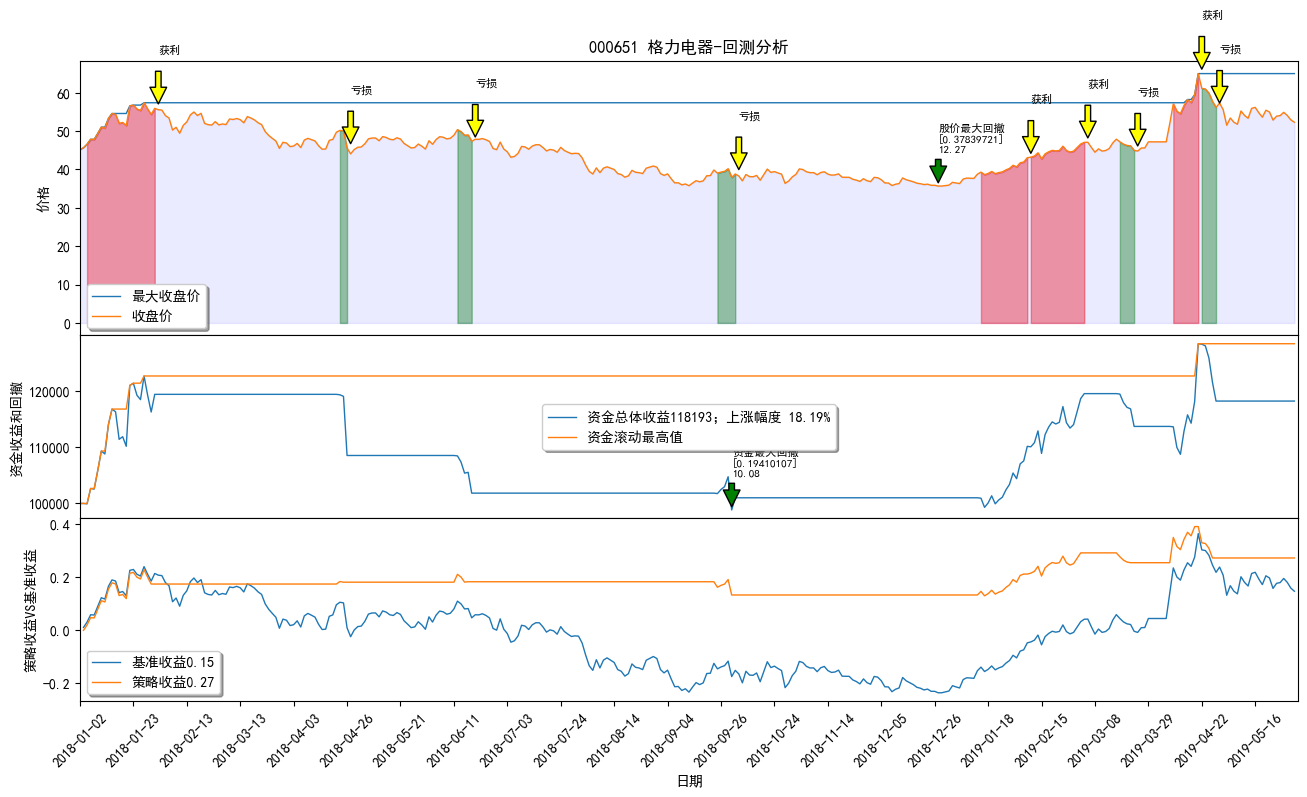

In [61]:
draw_stock = MultiTraceIf(**layout_dict)
draw_stock.graph_run(stock_data, **subplots_dict)

## 蒙特卡洛法最优化策略参数

In [62]:
def draw_absolute_profit_opt(stock_dat):

    cash_hold = 100000 # 初始资金
    posit_num = 0 # 持股数目
    skip_days = False # 持股/持币状态
    slippage = 0.01 # 滑点，默认为0.01
    c_rate = 5.0 / 10000  # 手续费，commission，默认万分之5
    t_rate = 1.0 / 1000  # 印花税，tax，默认千分之1

    # 绝对收益—资金的度量
    for kl_index, today in stock_dat.iterrows():
        # 买入/卖出执行代码
        if today.Signal == 1 and skip_days == False: # 买入
            skip_days = True
            posit_num = int(cash_hold / (today.Close + slippage))  # 资金转化为股票
            posit_num = int(posit_num / 100) * 100  # 买入股票最少100股，对posit_num向下取整百
            buy_cash = posit_num * (today.Close + slippage)  # 计算买入股票所需现金
            # 计算手续费，不足5元按5元收，并保留2位小数
            commission = round(max(buy_cash * c_rate, 5), 2)
            cash_hold = cash_hold - buy_cash - commission

        elif today.Signal == -1 and skip_days == True:  # 卖出 避免未买先卖
            skip_days = False
            sell_cash = posit_num * (today.Close - slippage)  # 计算卖出股票得到的现金 卖出股票可以不是整百。
            # 计算手续费，不足5元按5元收，并保留2位小数
            commission = round(max(sell_cash * c_rate, 5), 2)
            # 计算印花税，保留2位小数
            tax = round(sell_cash * t_rate, 2)
            cash_hold = cash_hold + sell_cash - commission - tax  # 剩余现金

        if skip_days == True: # 持股
            stock_dat.loc[kl_index,'total'] = posit_num * today.Close+ cash_hold
        else: # 空仓
            stock_dat.loc[kl_index,'total'] = cash_hold

    return stock_dat['total'][-1]

In [63]:
draw_absolute_profit_opt(stock_data)

111963.08000000002

In [64]:
def enum_optimize_para(stock_dat):
    n_para_list = []
    profit_list = []
    for n1 in range(20, 60):
        n_para_list.append(n1)
        profit_list.append(draw_absolute_profit_opt(get_ndays_atr_signal(stock_dat, N1 = n1)))
    print(n_para_list,profit_list)
    profit_max=max(profit_list)
    print(profit_list.index(max(profit_list)))
    n1_max=n_para_list[profit_list.index(max(profit_list))]

    plt.bar(n_para_list, profit_list)
    plt.annotate('n1='+str(n1_max)+'\n'+str(profit_max),\
                 xy=(n1_max,profit_max),xytext=(n1_max-5, profit_max-10),arrowprops=dict(facecolor='yellow',shrink=0.1),\
                 horizontalalignment='left',verticalalignment='top')

    # 设置坐标标签字体大小
    plt.xlabel('N1参数')
    plt.ylabel('资金收益')
    # 设置坐标轴的取值范围
    plt.xlim(min(n_para_list)-1, max(n_para_list)+1)
    plt.ylim(min(profit_list)*0.99, max(profit_list)*1.01)
    # 设置x坐标轴刻度
    plt.xticks(np.arange(min(n_para_list), max(n_para_list)+1, 1))
    # 设置图例字体大小
    plt.legend(['profit_list'], loc='best')
    plt.title("N1最优参数")
    plt.show()

止盈时间:18.01.31 止盈价格:55.94
止损时间:18.04.26 止损价格:45.58
止损时间:18.06.19 止损价格:47.33
止盈时间:19.02.11 止盈价格:43.07
止盈时间:19.03.05 止盈价格:47.08
止损时间:19.03.25 止损价格:44.99
止盈时间:19.04.19 止盈价格:65.0
止损时间:19.04.26 止损价格:56.18
止盈时间:18.01.31 止盈价格:55.94
止损时间:18.06.19 止损价格:47.33
止盈时间:19.02.11 止盈价格:43.07
止盈时间:19.03.05 止盈价格:47.08
止损时间:19.03.25 止损价格:44.99
止盈时间:19.04.19 止盈价格:65.0
止损时间:19.04.26 止损价格:56.18
止盈时间:18.01.31 止盈价格:55.94
止损时间:18.06.19 止损价格:47.33
止损时间:18.10.08 止损价格:37.93
止盈时间:19.02.11 止盈价格:43.07
止盈时间:19.03.05 止盈价格:47.08
止损时间:19.03.25 止损价格:44.99
止盈时间:19.04.19 止盈价格:65.0
止损时间:19.04.26 止损价格:56.18
止盈时间:18.01.31 止盈价格:55.94
止损时间:18.06.19 止损价格:47.33
止盈时间:19.02.11 止盈价格:43.07
止盈时间:19.03.05 止盈价格:47.08
止损时间:19.03.25 止损价格:44.99
止盈时间:19.04.19 止盈价格:65.0
止损时间:19.04.26 止损价格:56.18
止盈时间:18.01.31 止盈价格:55.94
止损时间:18.06.19 止损价格:47.33
止盈时间:19.02.11 止盈价格:43.07
止盈时间:19.03.05 止盈价格:47.08
止损时间:19.03.25 止损价格:44.99
止盈时间:19.04.19 止盈价格:65.0
止损时间:19.04.26 止损价格:56.18
止盈时间:18.01.31 止盈价格:55.94
止损时间:18.06.19 止损价格:47.33
止盈时间:19.02.11 止盈价格:43.07
止盈时间:

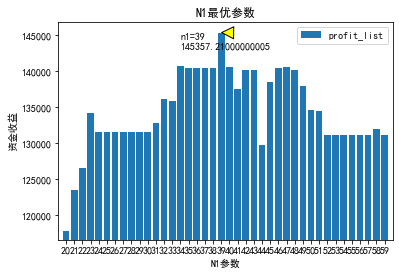

In [65]:
enum_optimize_para(stock_data)

In [66]:
#蒙特卡洛 小实验计算定积分
def draw_fx_square():
    plt.figure(figsize=(10,6))
    x_array = np.linspace(0, 3, 50)  # 等差数
    plt.plot(x_array, np.square(x_array), lw=2, label='$y=x^2$')

    plt.plot([1, 1], [0, np.square(2)], color="r")
    plt.plot([2, 2], [0, np.square(2)], color="r")
    plt.plot([1, 2], [np.square(2), np.square(2)], color="r")
    plt.plot([1, 2], [0, 0], color="r")

    plt.xlabel("x axis")
    plt.ylabel("y axis")
    plt.legend(loc='best')
    plt.show()

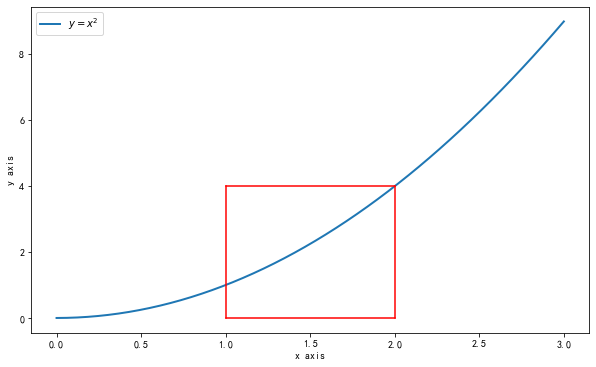

In [67]:
draw_fx_square()

In [68]:
def draw_integral_mc(n = 1000):

    x_min, x_max = 1.0, 2.0
    y_min, y_max = 0.0, 4.0
    Area = 4
    m = 0

    plt.figure(figsize=(10,6))
    x_array = np.linspace(0, 3, 50)  # 等差数
    plt.plot(x_array, np.square(x_array), lw=2, label='$y=x^2$')

    plt.plot([1, 1], [0, np.square(2)], color="r")
    plt.plot([2, 2], [0, np.square(2)], color="r")
    plt.plot([1, 2], [np.square(2), np.square(2)], color="r")
    plt.plot([1, 2], [0, 0], color="r")

    for i in range(0, n+1):
        x = np.random.uniform(x_min, x_max)
        y = np.random.uniform(y_min, y_max)
        # x*x > y 表示该点位于曲线的下面。
        if x*x > y:
            m += 1
            # s：标记大小 c：标记颜色
            plt.scatter(x, y, s=0.1, c="r", marker='o', alpha=1)  # 画点 点数太多时程序卡死
        else:
            plt.scatter(x, y, s=0.1, c="g", marker='o', alpha=1)  # 画点 点数太多时程序卡死
    #所求的积分值即为曲线下方的面积
    print(Area * m / float(n))
    plt.show()

2.252


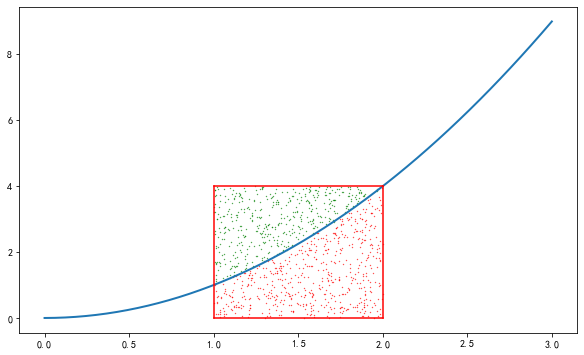

In [69]:
draw_integral_mc(n = 1000)

In [70]:
7/3

2.3333333333333335

即我们用蒙特卡洛法求解积分结果为2.312    
实际计算结果为7/3=2.333...


In [71]:
# 蒙特卡洛参数最优化 框架
def cal_ndayavg_mc_frame(stock_dat, n = 500):

    n1_min, n1_max = 10, 30
    n2_min, n2_max = 5, 15
    win_min, win_max = 1.5, 2.5
    loss_min, loss_max = 0.5, 1.5

    opt_para_list = []
    profit_list = []

    for i in range(0, n+1):
        n1 = int(np.random.uniform(n1_min, n1_max))
        n2 = int(np.random.uniform(n2_min, n2_max))
        win = round(np.random.uniform(win_min, win_max),1)
        loss = round(np.random.uniform(loss_min, loss_max),1)
        opt_para_list.append([n1,n2,win,loss])
        #此处添加策略代码

    return opt_para_list

In [72]:
def cal_ndayavg_mc(stock_dat, n = 500):

    n1_min, n1_max = 10, 30
    n2_min, n2_max = 5, 15
    win_min, win_max = 1.5, 2.5
    loss_min, loss_max = 0.5, 1.5

    opt_para_list = []
    profit_list = []

    for i in range(0, n+1):
        n1 = int(np.random.uniform(n1_min, n1_max))
        n2 = int(np.random.uniform(n2_min, n2_max))
        win = round(np.random.uniform(win_min, win_max),1)
        loss = round(np.random.uniform(loss_min, loss_max),1)
        opt_para_list.append([n1,n2,win,loss])
        #此处添加策略代码
        profit_list.append(draw_absolute_profit_opt(get_ndays_atr_signal(stock_dat, n1, n2, win, loss)))

    profit_max = max(profit_list)#maximize the profit
    opt_para_max = opt_para_list[profit_list.index(max(profit_list))]#correspond parametes
    print("maximize the profit is %s and correspond parametes are %s "%(profit_max, opt_para_max))

    fig = plt.figure(figsize=(10,6))
    plt.bar(np.arange(0,len(opt_para_list), 1), profit_list)
    plt.annotate(str(opt_para_max)+'\n'+str(profit_max),\
                 xy=(opt_para_list.index(opt_para_max),profit_max),xytext=(opt_para_list.index(opt_para_max)-10, profit_max-10),arrowprops=dict(facecolor='yellow',shrink=0.1),\
                 horizontalalignment='left',verticalalignment='top')

    # 设置坐标标签字体大小
    plt.xlabel('N1 N2 win loss 参数')
    plt.ylabel('资金收益')
    # 设置坐标轴的取值范围
    plt.ylim(min(profit_list)*0.99, max(profit_list)*1.01)
    # 设置图例字体大小
    plt.legend(['profit_list'], loc='best')
    plt.title("蒙特卡洛最优参数")
    plt.show()

止盈时间:18.01.31 止盈价格:55.94
止损时间:18.04.26 止损价格:45.58
止盈时间:19.02.14 止盈价格:44.35
止盈时间:19.02.20 止盈价格:44.99
止盈时间:19.03.05 止盈价格:47.08
止损时间:19.03.08 止损价格:44.51
止损时间:19.03.25 止损价格:44.99
止损时间:19.04.12 止损价格:54.55
止盈时间:19.04.19 止盈价格:65.0
止损时间:19.04.25 止损价格:57.75
止盈时间:18.01.31 止盈价格:55.94
止损时间:18.04.26 止损价格:45.58
止损时间:18.06.14 止损价格:48.94
止损时间:19.01.17 止损价格:38.66
止盈时间:19.02.14 止盈价格:44.35
止盈时间:19.02.20 止盈价格:44.99
止损时间:19.03.08 止损价格:44.51
止损时间:19.03.21 止损价格:46.27
止损时间:19.03.25 止损价格:44.99
止损时间:19.04.11 止损价格:55.2
止盈时间:19.04.19 止盈价格:65.0
止损时间:19.04.25 止损价格:57.75
止盈时间:18.01.31 止盈价格:55.94
止损时间:18.04.26 止损价格:45.58
止盈时间:19.02.11 止盈价格:43.07
止损时间:19.02.27 止损价格:44.55
止盈时间:19.03.05 止盈价格:47.08
止损时间:19.03.07 止损价格:45.74
止损时间:19.04.11 止损价格:55.2
止盈时间:19.04.19 止盈价格:65.0
止损时间:19.04.25 止损价格:57.75
止盈时间:18.01.31 止盈价格:55.94
止损时间:18.04.26 止损价格:45.58
止盈时间:19.02.13 止盈价格:43.51
止损时间:19.02.15 止损价格:42.75
止损时间:19.03.25 止损价格:44.99
止损时间:19.04.12 止损价格:54.55
止盈时间:19.04.19 止盈价格:65.0
止损时间:19.04.25 止损价格:57.75
止盈时间:18.01.31 止盈价格:55.94
止损时间:1

止盈时间:18.01.31 止盈价格:55.94
止损时间:18.06.14 止损价格:48.94
止损时间:18.06.27 止损价格:45.47
止盈时间:19.02.14 止盈价格:44.35
止盈时间:19.02.25 止盈价格:46.08
止损时间:19.04.11 止损价格:55.2
止损时间:19.04.22 止损价格:61.14
止盈时间:18.01.31 止盈价格:55.94
止损时间:18.06.14 止损价格:48.94
止损时间:18.10.18 止损价格:37.2
止损时间:19.01.17 止损价格:38.66
止盈时间:19.01.29 止盈价格:41.1
止盈时间:19.02.13 止盈价格:43.51
止损时间:19.02.15 止损价格:42.75
止盈时间:19.02.25 止盈价格:46.08
止盈时间:19.03.05 止盈价格:47.08
止损时间:19.03.07 止损价格:45.74
止损时间:19.03.19 止损价格:47.21
止损时间:19.03.25 止损价格:44.99
止盈时间:19.04.09 止盈价格:51.93
止损时间:19.04.11 止损价格:55.2
止损时间:19.04.22 止损价格:61.14
止损时间:19.04.25 止损价格:57.75
止盈时间:18.01.31 止盈价格:55.94
止损时间:18.04.26 止损价格:45.58
止损时间:18.06.14 止损价格:48.94
止盈时间:19.02.14 止盈价格:44.35
止盈时间:19.03.05 止盈价格:47.08
止损时间:19.03.08 止损价格:44.51
止损时间:19.03.25 止损价格:44.99
止盈时间:19.04.10 止盈价格:57.12
止损时间:19.04.22 止损价格:61.14
止盈时间:18.01.31 止盈价格:55.94
止损时间:18.04.26 止损价格:45.58
止损时间:18.06.14 止损价格:48.94
止盈时间:19.02.14 止盈价格:44.35
止损时间:19.03.20 止损价格:46.61
止损时间:19.03.25 止损价格:44.99
止损时间:19.04.11 止损价格:55.2
止损时间:19.04.22 止损价格:61.14
止盈时间:

止盈时间:18.01.31 止盈价格:55.94
止盈时间:19.02.14 止盈价格:44.35
止损时间:19.03.08 止损价格:44.51
止损时间:19.03.21 止损价格:46.27
止损时间:19.04.11 止损价格:55.2
止盈时间:19.04.19 止盈价格:65.0
止盈时间:18.01.31 止盈价格:55.94
止损时间:18.06.19 止损价格:47.33
止损时间:18.10.08 止损价格:37.93
止盈时间:19.01.31 止盈价格:41.75
止盈时间:19.02.14 止盈价格:44.35
止损时间:19.03.21 止损价格:46.27
止损时间:19.04.11 止损价格:55.2
止损时间:19.04.22 止损价格:61.14
止盈时间:18.01.31 止盈价格:55.94
止损时间:18.04.26 止损价格:45.58
止损时间:18.06.14 止损价格:48.94
止损时间:18.06.19 止损价格:47.33
止损时间:18.06.27 止损价格:45.47
止损时间:19.01.17 止损价格:38.66
止盈时间:19.02.11 止盈价格:43.07
止盈时间:19.02.25 止盈价格:46.08
止损时间:19.03.20 止损价格:46.61
止盈时间:19.04.09 止盈价格:51.93
止损时间:19.04.11 止损价格:55.2
止损时间:19.04.22 止损价格:61.14
止损时间:19.04.25 止损价格:57.75
止盈时间:18.01.31 止盈价格:55.94
止损时间:18.04.26 止损价格:45.58
止盈时间:19.02.11 止盈价格:43.07
止盈时间:19.02.25 止盈价格:46.08
止盈时间:19.03.05 止盈价格:47.08
止损时间:19.03.08 止损价格:44.51
止盈时间:19.04.10 止盈价格:57.12
止盈时间:19.04.19 止盈价格:65.0
止盈时间:18.01.31 止盈价格:55.94
止损时间:18.04.27 止损价格:44.08
止损时间:18.06.14 止损价格:48.94
止损时间:18.06.19 止损价格:47.33
止损时间:18.10.11 止损价格:37.05
止损时间:

止盈时间:19.01.31 止盈价格:41.75
止盈时间:19.02.14 止盈价格:44.35
止损时间:19.03.22 止损价格:46.16
止损时间:19.04.11 止损价格:55.2
止损时间:19.04.22 止损价格:61.14
止损时间:19.04.25 止损价格:57.75
止盈时间:18.01.31 止盈价格:55.94
止损时间:18.04.26 止损价格:45.58
止损时间:18.06.14 止损价格:48.94
止损时间:18.10.11 止损价格:37.05
止损时间:18.10.29 止损价格:36.38
止损时间:19.01.17 止损价格:38.66
止盈时间:19.01.29 止盈价格:41.1
止盈时间:19.02.11 止盈价格:43.07
止盈时间:19.02.20 止盈价格:44.99
止盈时间:19.03.05 止盈价格:47.08
止损时间:19.03.07 止损价格:45.74
止损时间:19.03.21 止损价格:46.27
止损时间:19.03.25 止损价格:44.99
止损时间:19.04.11 止损价格:55.2
止损时间:19.04.22 止损价格:61.14
止损时间:19.04.26 止损价格:56.18
止盈时间:18.01.31 止盈价格:55.94
止损时间:18.04.26 止损价格:45.58
止盈时间:19.01.29 止盈价格:41.1
止盈时间:19.02.12 止盈价格:43.22
止盈时间:19.02.20 止盈价格:44.99
止盈时间:19.03.04 止盈价格:46.65
止损时间:19.04.12 止损价格:54.55
止盈时间:19.04.19 止盈价格:65.0
止盈时间:18.01.31 止盈价格:55.94
止损时间:18.04.26 止损价格:45.58
止损时间:18.06.14 止损价格:48.94
止损时间:18.06.19 止损价格:47.33
止损时间:18.06.27 止损价格:45.47
止盈时间:19.01.29 止盈价格:41.1
止损时间:19.02.15 止损价格:42.75
止损时间:19.02.26 止损价格:44.93
止盈时间:19.03.06 止盈价格:47.1
止损时间:19.03.20 止损价格:46.61
止损时间:19

止盈时间:18.01.31 止盈价格:55.94
止损时间:18.04.26 止损价格:45.58
止损时间:18.06.19 止损价格:47.33
止盈时间:19.02.14 止盈价格:44.35
止盈时间:19.03.18 止盈价格:47.9
止损时间:19.04.11 止损价格:55.2
止盈时间:19.04.19 止盈价格:65.0
止损时间:19.05.06 止损价格:51.53
止盈时间:18.01.31 止盈价格:55.94
止损时间:18.04.26 止损价格:45.58
止损时间:18.06.14 止损价格:48.94
止损时间:18.06.19 止损价格:47.33
止损时间:18.10.11 止损价格:37.05
止盈时间:19.01.31 止盈价格:41.75
止盈时间:19.02.14 止盈价格:44.35
止盈时间:19.02.20 止盈价格:44.99
止损时间:19.03.25 止损价格:44.99
止盈时间:19.04.09 止盈价格:51.93
止损时间:19.04.11 止损价格:55.2
止损时间:19.04.22 止损价格:61.14
止盈时间:18.01.31 止盈价格:55.94
止损时间:18.04.26 止损价格:45.58
止损时间:18.06.14 止损价格:48.94
止盈时间:19.01.31 止盈价格:41.75
止盈时间:19.02.14 止盈价格:44.35
止盈时间:19.02.20 止盈价格:44.99
止损时间:19.03.20 止损价格:46.61
止损时间:19.03.25 止损价格:44.99
止盈时间:19.04.10 止盈价格:57.12
止损时间:19.04.22 止损价格:61.14
止盈时间:18.01.31 止盈价格:55.94
止损时间:18.04.26 止损价格:45.58
止损时间:18.06.14 止损价格:48.94
止损时间:18.10.29 止损价格:36.38
止损时间:19.01.17 止损价格:38.66
止盈时间:19.01.29 止盈价格:41.1
止盈时间:19.02.11 止盈价格:43.07
止盈时间:19.02.20 止盈价格:44.99
止损时间:19.02.26 止损价格:44.93
止盈时间:19.03.04 止盈价格:46.65
止损时间:

止盈时间:18.01.31 止盈价格:55.94
止损时间:18.04.26 止损价格:45.58
止损时间:18.06.19 止损价格:47.33
止盈时间:19.02.12 止盈价格:43.22
止盈时间:19.03.05 止盈价格:47.08
止损时间:19.03.08 止损价格:44.51
止损时间:19.03.25 止损价格:44.99
止盈时间:19.04.09 止盈价格:51.93
止损时间:19.04.12 止损价格:54.55
止损时间:19.04.22 止损价格:61.14
止盈时间:18.01.31 止盈价格:55.94
止损时间:18.04.26 止损价格:45.58
止损时间:18.10.29 止损价格:36.38
止盈时间:19.01.29 止盈价格:41.1
止盈时间:19.02.11 止盈价格:43.07
止损时间:19.02.15 止损价格:42.75
止盈时间:19.03.05 止盈价格:47.08
止损时间:19.03.21 止损价格:46.27
止盈时间:19.04.10 止盈价格:57.12
止损时间:19.04.22 止损价格:61.14
止盈时间:18.01.31 止盈价格:55.94
止损时间:18.04.26 止损价格:45.58
止损时间:18.06.14 止损价格:48.94
止损时间:18.06.19 止损价格:47.33
止损时间:18.10.08 止损价格:37.93
止损时间:18.10.11 止损价格:37.05
止盈时间:19.02.14 止盈价格:44.35
止损时间:19.03.22 止损价格:46.16
止损时间:19.04.11 止损价格:55.2
止损时间:19.04.22 止损价格:61.14
止盈时间:18.01.31 止盈价格:55.94
止损时间:18.04.26 止损价格:45.58
止盈时间:18.06.12 止盈价格:50.4
止损时间:18.06.14 止损价格:48.94
止损时间:18.10.08 止损价格:37.93
止损时间:18.10.11 止损价格:37.05
止损时间:18.10.29 止损价格:36.38
止盈时间:19.01.16 止盈价格:39.31
止盈时间:19.01.28 止盈价格:40.29
止盈时间:19.02.13 止盈价格:43.51
止损时

止盈时间:18.01.31 止盈价格:55.94
止损时间:18.04.26 止损价格:45.58
止损时间:18.06.14 止损价格:48.94
止损时间:18.10.29 止损价格:36.38
止盈时间:19.02.14 止盈价格:44.35
止盈时间:19.02.25 止盈价格:46.08
止损时间:19.03.07 止损价格:45.74
止损时间:19.03.20 止损价格:46.61
止损时间:19.03.25 止损价格:44.99
止损时间:19.04.11 止损价格:55.2
止损时间:19.04.22 止损价格:61.14
止损时间:19.04.25 止损价格:57.75
止损时间:19.05.06 止损价格:51.53
止盈时间:18.01.31 止盈价格:55.94
止损时间:18.04.26 止损价格:45.58
止损时间:18.06.14 止损价格:48.94
止盈时间:19.01.29 止盈价格:41.1
止盈时间:19.02.14 止盈价格:44.35
止盈时间:19.02.20 止盈价格:44.99
止损时间:19.03.07 止损价格:45.74
止损时间:19.03.26 止损价格:44.8
止损时间:19.04.11 止损价格:55.2
止损时间:19.04.22 止损价格:61.14
止盈时间:18.01.31 止盈价格:55.94
止损时间:18.04.26 止损价格:45.58
止损时间:18.06.14 止损价格:48.94
止损时间:18.06.27 止损价格:45.47
止损时间:19.01.17 止损价格:38.66
止盈时间:19.01.29 止盈价格:41.1
止盈时间:19.02.13 止盈价格:43.51
止损时间:19.02.15 止损价格:42.75
止盈时间:19.03.05 止盈价格:47.08
止损时间:19.03.07 止损价格:45.74
止损时间:19.03.21 止损价格:46.27
止损时间:19.04.11 止损价格:55.2
止盈时间:19.04.19 止盈价格:65.0
止盈时间:18.01.31 止盈价格:55.94
止损时间:18.04.26 止损价格:45.58
止损时间:18.10.08 止损价格:37.93
止损时间:18.10.29 止损价格:36.38
止盈时间:19

止盈时间:19.02.14 止盈价格:44.35
止损时间:19.03.25 止损价格:44.99
止损时间:19.04.12 止损价格:54.55
止盈时间:19.04.19 止盈价格:65.0
止盈时间:18.01.31 止盈价格:55.94
止损时间:18.04.26 止损价格:45.58
止损时间:18.06.19 止损价格:47.33
止损时间:18.10.08 止损价格:37.93
止损时间:18.10.11 止损价格:37.05
止盈时间:19.01.29 止盈价格:41.1
止盈时间:19.02.14 止盈价格:44.35
止损时间:19.03.07 止损价格:45.74
止损时间:19.03.20 止损价格:46.61
止损时间:19.03.25 止损价格:44.99
止损时间:19.04.11 止损价格:55.2
止损时间:19.04.22 止损价格:61.14
止盈时间:18.01.31 止盈价格:55.94
止损时间:18.04.26 止损价格:45.58
止损时间:18.06.14 止损价格:48.94
止损时间:18.06.19 止损价格:47.33
止损时间:18.10.11 止损价格:37.05
止盈时间:19.02.14 止盈价格:44.35
止盈时间:19.02.25 止盈价格:46.08
止损时间:19.03.25 止损价格:44.99
止损时间:19.04.11 止损价格:55.2
止盈时间:19.04.19 止盈价格:65.0
止损时间:19.04.25 止损价格:57.75
止盈时间:18.01.31 止盈价格:55.94
止损时间:18.04.26 止损价格:45.58
止盈时间:19.01.29 止盈价格:41.1
止盈时间:19.02.14 止盈价格:44.35
止盈时间:19.02.20 止盈价格:44.99
止盈时间:19.03.05 止盈价格:47.08
止损时间:19.03.08 止损价格:44.51
止损时间:19.04.12 止损价格:54.55
止损时间:19.04.22 止损价格:61.14
止盈时间:18.01.31 止盈价格:55.94
止损时间:18.04.26 止损价格:45.58
止损时间:18.06.14 止损价格:48.94
止损时间:18.06.19 止损价格:47.33
止损时间:1

止盈时间:18.01.31 止盈价格:55.94
止损时间:18.04.26 止损价格:45.58
止损时间:18.10.08 止损价格:37.93
止盈时间:19.02.14 止盈价格:44.35
止损时间:19.03.08 止损价格:44.51
止损时间:19.03.26 止损价格:44.8
止盈时间:19.04.10 止盈价格:57.12
止损时间:19.04.22 止损价格:61.14
止盈时间:18.01.31 止盈价格:55.94
止损时间:18.04.26 止损价格:45.58
止损时间:18.06.14 止损价格:48.94
止损时间:18.06.19 止损价格:47.33
止损时间:18.06.27 止损价格:45.47
止损时间:18.10.11 止损价格:37.05
止盈时间:18.10.22 止盈价格:40.11
止损时间:18.10.29 止损价格:36.38
止损时间:19.01.17 止损价格:38.66
止盈时间:19.01.29 止盈价格:41.1
止盈时间:19.02.13 止盈价格:43.51
止损时间:19.02.15 止损价格:42.75
止损时间:19.02.26 止损价格:44.93
止盈时间:19.03.04 止盈价格:46.65
止损时间:19.03.07 止损价格:45.74
止损时间:19.04.11 止损价格:55.2
止盈时间:19.04.19 止盈价格:65.0
止损时间:19.04.25 止损价格:57.75
止盈时间:18.01.31 止盈价格:55.94
止损时间:18.04.26 止损价格:45.58
止损时间:18.10.08 止损价格:37.93
止盈时间:19.02.13 止盈价格:43.51
止损时间:19.02.15 止损价格:42.75
止盈时间:19.03.04 止盈价格:46.65
止损时间:19.03.07 止损价格:45.74
止损时间:19.03.20 止损价格:46.61
止损时间:19.03.25 止损价格:44.99
止损时间:19.04.11 止损价格:55.2
止损时间:19.04.22 止损价格:61.14
止盈时间:18.01.31 止盈价格:55.94
止损时间:18.04.26 止损价格:45.58
止损时间:18.06.14 止损价格:48.94
止损时间:

止盈时间:18.01.31 止盈价格:55.94
止损时间:18.04.26 止损价格:45.58
止损时间:18.06.14 止损价格:48.94
止损时间:18.10.11 止损价格:37.05
止损时间:18.10.18 止损价格:37.2
止损时间:18.10.29 止损价格:36.38
止盈时间:19.01.29 止盈价格:41.1
止损时间:19.02.15 止损价格:42.75
止盈时间:19.03.05 止盈价格:47.08
止损时间:19.03.07 止损价格:45.74
止损时间:19.03.22 止损价格:46.16
止盈时间:19.04.10 止盈价格:57.12
止损时间:19.04.22 止损价格:61.14
止损时间:19.05.06 止损价格:51.53
止盈时间:18.01.31 止盈价格:55.94
止损时间:18.10.08 止损价格:37.93
止损时间:18.10.29 止损价格:36.38
止盈时间:19.01.29 止盈价格:41.1
止盈时间:19.02.14 止盈价格:44.35
止损时间:19.03.25 止损价格:44.99
止损时间:19.04.12 止损价格:54.55
止损时间:19.04.22 止损价格:61.14
止盈时间:18.01.31 止盈价格:55.94
止损时间:18.06.19 止损价格:47.33
止盈时间:19.02.14 止盈价格:44.35
止损时间:19.03.25 止损价格:44.99
止损时间:19.04.11 止损价格:55.2
止损时间:19.04.22 止损价格:61.14
止盈时间:18.01.31 止盈价格:55.94
止损时间:18.04.26 止损价格:45.58
止损时间:18.06.14 止损价格:48.94
止损时间:18.06.19 止损价格:47.33
止盈时间:19.01.31 止盈价格:41.75
止盈时间:19.02.14 止盈价格:44.35
止盈时间:19.02.20 止盈价格:44.99
止损时间:19.03.07 止损价格:45.74
止损时间:19.03.20 止损价格:46.61
止损时间:19.03.25 止损价格:44.99
止损时间:19.04.11 止损价格:55.2
止损时间:19.04.22 止损价格:61.14
止盈时间:

止盈时间:18.01.31 止盈价格:55.94
止损时间:18.06.19 止损价格:47.33
止损时间:18.10.08 止损价格:37.93
止损时间:18.10.18 止损价格:37.2
止盈时间:19.02.13 止盈价格:43.51
止损时间:19.02.15 止损价格:42.75
止损时间:19.03.08 止损价格:44.51
止损时间:19.03.21 止损价格:46.27
止损时间:19.03.25 止损价格:44.99
止损时间:19.04.11 止损价格:55.2
止损时间:19.04.22 止损价格:61.14
止损时间:19.04.25 止损价格:57.75
止盈时间:18.01.31 止盈价格:55.94
止损时间:18.06.19 止损价格:47.33
止损时间:18.10.29 止损价格:36.38
止盈时间:19.02.14 止盈价格:44.35
止损时间:19.04.12 止损价格:54.55
止盈时间:19.04.19 止盈价格:65.0
止盈时间:18.01.31 止盈价格:55.94
止损时间:18.06.19 止损价格:47.33
止盈时间:19.02.12 止盈价格:43.22
止损时间:19.03.08 止损价格:44.51
止损时间:19.03.25 止损价格:44.99
止盈时间:19.04.09 止盈价格:51.93
止损时间:19.04.11 止损价格:55.2
止损时间:19.04.22 止损价格:61.14
止盈时间:18.01.31 止盈价格:55.94
止损时间:18.04.26 止损价格:45.58
止损时间:18.06.14 止损价格:48.94
止损时间:18.06.19 止损价格:47.33
止损时间:18.10.29 止损价格:36.38
止盈时间:19.01.29 止盈价格:41.1
止盈时间:19.02.11 止盈价格:43.07
止损时间:19.02.15 止损价格:42.75
止盈时间:19.02.25 止盈价格:46.08
止盈时间:19.03.05 止盈价格:47.08
止损时间:19.03.07 止损价格:45.74
止损时间:19.03.22 止损价格:46.16
止盈时间:19.04.10 止盈价格:57.12
止盈时间:19.04.19 止盈价格:65.0
止损时间:1

止盈时间:18.01.31 止盈价格:55.94
止损时间:18.04.26 止损价格:45.58
止损时间:18.06.14 止损价格:48.94
止损时间:18.06.19 止损价格:47.33
止损时间:18.10.18 止损价格:37.2
止损时间:18.10.29 止损价格:36.38
止盈时间:19.02.13 止盈价格:43.51
止损时间:19.02.15 止损价格:42.75
止损时间:19.03.20 止损价格:46.61
止损时间:19.03.25 止损价格:44.99
止盈时间:19.04.10 止盈价格:57.12
止损时间:19.04.22 止损价格:61.14
止损时间:19.05.06 止损价格:51.53
止盈时间:18.01.31 止盈价格:55.94
止损时间:18.04.26 止损价格:45.58
止损时间:18.06.14 止损价格:48.94
止损时间:19.01.17 止损价格:38.66
止盈时间:19.01.29 止盈价格:41.1
止盈时间:19.02.11 止盈价格:43.07
止损时间:19.02.26 止损价格:44.93
止盈时间:19.03.04 止盈价格:46.65
止损时间:19.03.07 止损价格:45.74
止损时间:19.03.21 止损价格:46.27
止损时间:19.03.25 止损价格:44.99
止盈时间:19.04.09 止盈价格:51.93
止损时间:19.04.11 止损价格:55.2
止损时间:19.04.22 止损价格:61.14
止损时间:19.04.30 止损价格:55.58
止盈时间:18.01.31 止盈价格:55.94
止损时间:18.04.26 止损价格:45.58
止损时间:18.10.11 止损价格:37.05
止损时间:18.10.29 止损价格:36.38
止盈时间:19.02.14 止盈价格:44.35
止盈时间:19.03.05 止盈价格:47.08
止损时间:19.03.08 止损价格:44.51
止盈时间:19.04.10 止盈价格:57.12
止损时间:19.04.22 止损价格:61.14
止损时间:19.05.06 止损价格:51.53
止盈时间:18.01.31 止盈价格:55.94
止损时间:18.04.26 止损价格:45.58
止损时

止盈时间:19.01.29 止盈价格:41.1
止盈时间:19.02.11 止盈价格:43.07
止盈时间:19.02.20 止盈价格:44.99
止盈时间:19.03.05 止盈价格:47.08
止损时间:19.03.07 止损价格:45.74
止损时间:19.04.11 止损价格:55.2
止盈时间:19.04.19 止盈价格:65.0
止盈时间:18.01.31 止盈价格:55.94
止损时间:18.04.26 止损价格:45.58
止损时间:18.06.14 止损价格:48.94
止损时间:18.06.19 止损价格:47.33
止损时间:18.10.11 止损价格:37.05
止盈时间:19.01.29 止盈价格:41.1
止盈时间:19.02.13 止盈价格:43.51
止损时间:19.02.15 止损价格:42.75
止盈时间:19.03.05 止盈价格:47.08
止损时间:19.03.08 止损价格:44.51
止损时间:19.03.22 止损价格:46.16
止盈时间:19.04.09 止盈价格:51.93
止损时间:19.04.11 止损价格:55.2
止损时间:19.04.22 止损价格:61.14
止盈时间:18.01.31 止盈价格:55.94
止损时间:18.04.26 止损价格:45.58
止损时间:18.06.14 止损价格:48.94
止盈时间:19.01.29 止盈价格:41.1
止盈时间:19.02.13 止盈价格:43.51
止损时间:19.02.15 止损价格:42.75
止损时间:19.02.26 止损价格:44.93
止盈时间:19.03.04 止盈价格:46.65
止损时间:19.03.22 止损价格:46.16
止盈时间:19.04.10 止盈价格:57.12
止损时间:19.04.22 止损价格:61.14
止损时间:19.04.25 止损价格:57.75
止盈时间:18.01.31 止盈价格:55.94
止盈时间:19.01.29 止盈价格:41.1
止盈时间:19.02.14 止盈价格:44.35
止盈时间:19.03.05 止盈价格:47.08
止损时间:19.03.22 止损价格:46.16
止损时间:19.04.12 止损价格:54.55
止损时间:19.04.22 止损价格:61.14
止损时间:19

止损时间:19.03.08 止损价格:44.51
止损时间:19.03.21 止损价格:46.27
止损时间:19.03.25 止损价格:44.99
止盈时间:19.04.10 止盈价格:57.12
止盈时间:19.04.19 止盈价格:65.0
止盈时间:18.01.31 止盈价格:55.94
止损时间:18.04.26 止损价格:45.58
止盈时间:19.01.31 止盈价格:41.75
止盈时间:19.02.14 止盈价格:44.35
止损时间:19.04.12 止损价格:54.55
止损时间:19.04.22 止损价格:61.14
止盈时间:18.01.31 止盈价格:55.94
止损时间:18.04.26 止损价格:45.58
止损时间:18.06.14 止损价格:48.94
止损时间:18.06.19 止损价格:47.33
止盈时间:19.01.31 止盈价格:41.75
止盈时间:19.02.14 止盈价格:44.35
止盈时间:19.02.20 止盈价格:44.99
止损时间:19.03.22 止损价格:46.16
止损时间:19.04.11 止损价格:55.2
止损时间:19.04.22 止损价格:61.14
止损时间:19.04.25 止损价格:57.75
止盈时间:18.01.31 止盈价格:55.94
止损时间:18.04.27 止损价格:44.08
止损时间:18.10.08 止损价格:37.93
止损时间:18.10.11 止损价格:37.05
止损时间:18.10.29 止损价格:36.38
止盈时间:19.01.25 止盈价格:39.9
止盈时间:19.02.11 止盈价格:43.07
止损时间:19.03.20 止损价格:46.61
止损时间:19.03.25 止损价格:44.99
止损时间:19.04.11 止损价格:55.2
止盈时间:19.04.19 止盈价格:65.0
止损时间:19.04.26 止损价格:56.18
止盈时间:18.01.31 止盈价格:55.94
止损时间:18.10.08 止损价格:37.93
止盈时间:19.02.12 止盈价格:43.22
止损时间:19.02.27 止损价格:44.55
止损时间:19.04.11 止损价格:55.2
止损时间:19.04.22 止损价格:61.14
止盈时间:1

止盈时间:18.01.31 止盈价格:55.94
止损时间:18.04.26 止损价格:45.58
止损时间:18.06.14 止损价格:48.94
止损时间:18.10.08 止损价格:37.93
止损时间:19.01.17 止损价格:38.66
止盈时间:19.02.11 止盈价格:43.07
止盈时间:19.02.20 止盈价格:44.99
止盈时间:19.03.04 止盈价格:46.65
止损时间:19.03.08 止损价格:44.51
止损时间:19.03.20 止损价格:46.61
止损时间:19.04.11 止损价格:55.2
止损时间:19.04.22 止损价格:61.14
止损时间:19.04.25 止损价格:57.75
止盈时间:18.01.31 止盈价格:55.94
止损时间:18.04.26 止损价格:45.58
止盈时间:19.02.11 止盈价格:43.07
止损时间:19.04.11 止损价格:55.2
止盈时间:19.04.19 止盈价格:65.0
止盈时间:18.01.31 止盈价格:55.94
止损时间:18.04.26 止损价格:45.58
止损时间:18.06.14 止损价格:48.94
止损时间:18.06.19 止损价格:47.33
止盈时间:19.02.11 止盈价格:43.07
止损时间:19.02.26 止损价格:44.93
止损时间:19.03.08 止损价格:44.51
止损时间:19.03.20 止损价格:46.61
止盈时间:19.04.09 止盈价格:51.93
止损时间:19.04.11 止损价格:55.2
止损时间:19.04.22 止损价格:61.14
止盈时间:18.01.31 止盈价格:55.94
止损时间:18.04.26 止损价格:45.58
止损时间:18.10.08 止损价格:37.93
止损时间:18.10.11 止损价格:37.05
止损时间:18.10.29 止损价格:36.38
止盈时间:19.02.11 止盈价格:43.07
止盈时间:19.02.20 止盈价格:44.99
止盈时间:19.03.04 止盈价格:46.65
止损时间:19.03.07 止损价格:45.74
止损时间:19.03.21 止损价格:46.27
止损时间:19.03.25 止损价格:44.99
止盈时间

止盈时间:18.01.31 止盈价格:55.94
止损时间:18.04.26 止损价格:45.58
止盈时间:19.01.29 止盈价格:41.1
止盈时间:19.02.11 止盈价格:43.07
止盈时间:19.02.25 止盈价格:46.08
止损时间:19.04.11 止损价格:55.2
止损时间:19.04.22 止损价格:61.14
止盈时间:18.01.31 止盈价格:55.94
止损时间:18.04.26 止损价格:45.58
止盈时间:19.01.29 止盈价格:41.1
止盈时间:19.02.14 止盈价格:44.35
止盈时间:19.02.20 止盈价格:44.99
止盈时间:19.03.05 止盈价格:47.08
止损时间:19.03.08 止损价格:44.51
止盈时间:19.03.18 止盈价格:47.9
止损时间:19.03.25 止损价格:44.99
止损时间:19.04.12 止损价格:54.55
止损时间:19.04.22 止损价格:61.14
止盈时间:18.01.31 止盈价格:55.94
止损时间:18.04.26 止损价格:45.58
止损时间:18.06.19 止损价格:47.33
止损时间:18.10.08 止损价格:37.93
止损时间:18.10.29 止损价格:36.38
止盈时间:19.02.14 止盈价格:44.35
止盈时间:19.02.20 止盈价格:44.99
止损时间:19.03.08 止损价格:44.51
止损时间:19.03.25 止损价格:44.99
止损时间:19.04.11 止损价格:55.2
止盈时间:19.04.19 止盈价格:65.0
止盈时间:18.01.31 止盈价格:55.94
止损时间:18.04.26 止损价格:45.58
止损时间:18.06.14 止损价格:48.94
止损时间:18.06.19 止损价格:47.33
止损时间:18.10.11 止损价格:37.05
止盈时间:19.02.14 止盈价格:44.35
止损时间:19.02.26 止损价格:44.93
止损时间:19.03.20 止损价格:46.61
止损时间:19.03.25 止损价格:44.99
止盈时间:19.04.09 止盈价格:51.93
止损时间:19.04.11 止损价格:55.2
止损时间:19

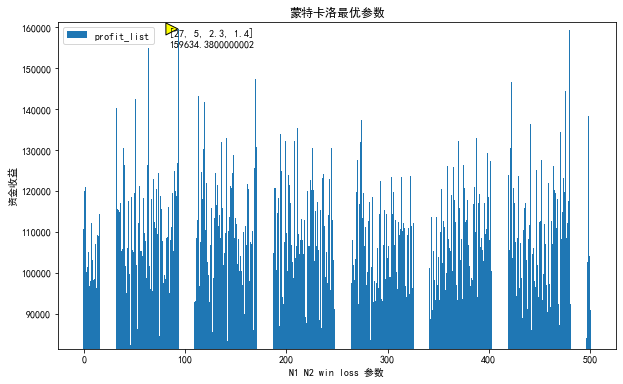

In [73]:
cal_ndayavg_mc(stock_data, n = 500)

## 基于凯利公式量化仓位管理

In [74]:
# 模拟是否仓位在f时资金增长的速度最快
def positmanage_test(play_cnt=1000, win_rate=0.6, position=1):
    my_money = np.zeros(play_cnt)
    my_money[0] = 1000
    for i in range(1, play_cnt):
        binomial = np.random.binomial(1, win_rate, 1)
        once_chip = my_money[i - 1] * position # 下注资金
        if binomial == True :
            my_money[i] = my_money[i - 1] + once_chip
        else:
            my_money[i] = my_money[i - 1] - once_chip
        if my_money[i] <= 0:
            break
    return my_money[-1]

In [75]:
def verify_kelly_profit():

    post_list = []
    profit_list = []

    for v_post in np.arange(0, 1.5, 0.1): # [0-1]每间隔0.1产生一个下注仓位

        post_list.append(v_post)
        profit_list.append(positmanage_test(play_cnt=1000, win_rate=0.6, position=v_post))

    profit_max = max(profit_list)  # maximize the profit
    post_max = post_list[profit_list.index(max(profit_list))]  # correspond position
    print("maximize the profit is %s and correspond position are %s " % (profit_max, post_max))

    plt.bar(np.arange(0, len(post_list)), profit_list)
    plt.annotate(str(post_max) + '\n' + str(profit_max), \
                 xy=(post_list.index(post_max), profit_max),
                 xytext=(post_list.index(post_max)-2, profit_max),
                 arrowprops=dict(facecolor='yellow', shrink=0.1), \
                 horizontalalignment='left', verticalalignment='top')

    plt.xlabel('仓位比例')
    plt.ylabel('资金收益')
    plt.xticks(np.arange(0, len(post_list)), ['%.1f'%(i) for i in np.arange(0, 1.5, 0.1)]) # 设置坐标轴的刻度范围
    plt.ylim(min(profit_list) * 0.99, max(profit_list) * 1.01) # 设置坐标轴的取值范围
    plt.title("验证凯利公式仓位比例与资金最大化")
    plt.show()

maximize the profit is 382671750264.858 and correspond position are 0.1 


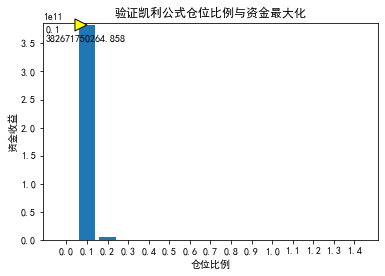

In [76]:
verify_kelly_profit()

## 用经典选股策略完善股票量化体系

### 线性回归的原理及实现

In [77]:
df_stockload = bs_k_daily_stock("sz.000651", '2018-06-01', '2019-06-01')

login success!
logout success!


In [78]:
df_stockload_fst = bs_k_daily_stock("sz.000651", '2018-06-01', '2019-01-01')

login success!
logout success!


In [79]:
df_stockload_sec = bs_k_daily_stock("sz.000651", '2019-01-01', '2019-06-01')

login success!
logout success!


方法一

In [80]:
def linear_regression_temp():
    seq_num = 100
    x = np.linspace(0, 10, seq_num)
    X = sm.add_constant(x)
    beta = np.array([1, 5])
    e = np.random.normal(size=seq_num)
    Y = np.dot(X, beta) + e
    model = regression.linear_model.OLS(Y,X)
    #model = sm.OLS(Y,X)
    results = model.fit()
    print(results.params) # [1.38760035 4.91969889]
    #print(results.summary())

In [81]:
linear_regression_temp()

[1.02394289 5.01735825]


方法二

In [82]:
def create_plot(x, y, styles, labels, axlabels):
    plt.figure(figsize=(10, 6))
    for i in range(len(x)):
        plt.plot(x[i], y[i], styles[i], label=labels[i])
        plt.xlabel(axlabels[0])
        plt.ylabel(axlabels[1])
    plt.legend(loc=0)

In [83]:
x = np.linspace(0, 10, 100)

In [84]:
e = np.random.normal(size=100)

In [85]:
y = 1 + 5 * x + e

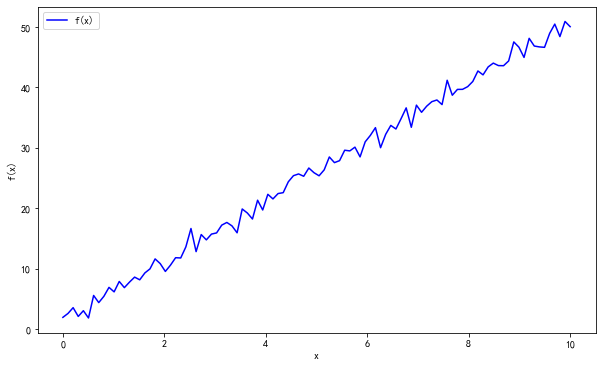

In [86]:
create_plot([x], [y], ['b'], ['f(x)'], ['x', 'f(x)'])

In [87]:
 res = np.polyfit(x, y, deg=1, full=True)

In [88]:
res

(array([4.94241623, 1.36585068]),
 array([105.4958306]),
 2,
 array([1.36522772, 0.36898954]),
 2.220446049250313e-14)

In [89]:
ry = np.polyval(res[0], x)

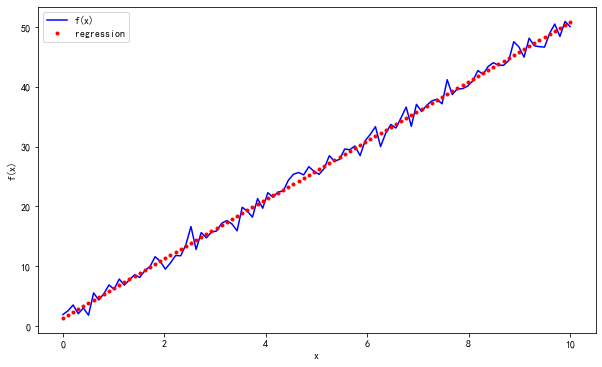

In [90]:
create_plot([x, x], [y, ry], ['b', 'r.'],
 ['f(x)', 'regression'], ['x', 'f(x)'])

### 用走势线性回归建立选股模型

In [91]:
def linear_regression_close(stock):

    y_arr = stock.Close.values
    x_arr = np.arange(0, len(y_arr))

    x_b_arr = sm.add_constant(x_arr)  # 添加常数列1
    model = regression.linear_model.OLS(y_arr, x_b_arr).fit()  # 使用OLS做拟合
    rad = model.params[1]  # y = kx + b :params[1] = k
    intercept = model.params[0]  # y = kx + b :params[0] = b
    reg_y_fit = x_arr * rad + intercept
    deg = np.rad2deg(rad)  # 弧度转换为角度
    print(deg)
    # matplotlib 绘制
    fig = plt.figure(figsize=(10,6))
    plt.scatter(x_arr, y_arr, s=1, c="g", marker='o', alpha=1)  # 画点
    #plt.plot(x_arr, y_arr)
    plt.plot(x_arr, reg_y_fit, 'r')
    plt.title(u"格力电器" + " y = " + str(round(rad,2)) + " * x + " + str(round(intercept,2)))
    plt.legend(['close', 'linear'], loc='best')
    plt.show()

2.237848978702092


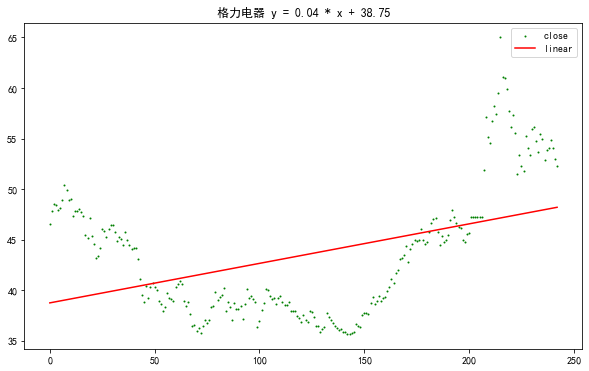

In [92]:
linear_regression_close(df_stockload.copy(deep=True))

In [93]:
def linear_regression_close_2(stock):

    y_arr = stock.Close.values
    x_arr = np.arange(0, len(y_arr))

    res = np.polyfit(x_arr, y_arr, deg=1, full=True)
    reg_y_fit = np.polyval(res[0], x_arr)
    print(res[0])
    # matplotlib 绘制
    fig = plt.figure(figsize=(10,6))
    plt.scatter(x_arr, y_arr, s=1, c="g", marker='o', alpha=1)  # 画点
    #plt.plot(x_arr, y_arr)
    plt.plot(x_arr, reg_y_fit, 'r')
    plt.title(u"格力电器" + " y = " + str(round(res[0][0],2)) + " * x + " + str(round(res[0][1],2)))
    plt.legend(['close', 'linear'], loc='best')
    plt.show()

[ 0.03905783 38.75494873]


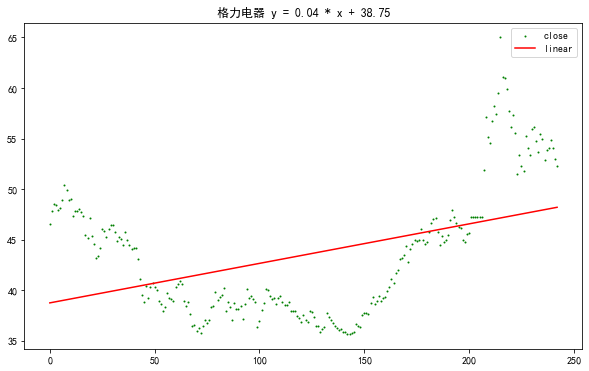

In [94]:
linear_regression_close_2(df_stockload.copy(deep=True))

In [95]:
def close_to_deg(code, start='2018-01-01', end='2019-01-01'):
    deg_data = []
    try:
        df_data = bs_k_daily_stock(code, start, end)
        y_arr = df_data.Close.values
        x_arr = np.arange(0, len(y_arr))
        x_b_arr = sm.add_constant(x_arr)  # 添加常数列1
        model = regression.linear_model.OLS(y_arr, x_b_arr).fit()  # 使用OLS做拟合
        rad = model.params[1]  # y = kx + b :params[1] = k
        deg_data = np.rad2deg(rad)  # 弧度转换为角度
    except:
        print("error code is %s" % code)
    return deg_data

In [96]:
close_to_deg('300710')

login success!
logout success!


-4.70385334503171

In [97]:
def json_to_str():
    with open('stock_20_pool.json', 'r', encoding='utf-8') as f:
        stock_index = json.load(f)
    return stock_index

In [98]:
def get_daily_deg_for(start='2018-01-01', end='2019-01-01'):
    stock_index = json_to_str()
    codes = [code[:6] for code in list(stock_index['股票'].values())]
    codes
    deg_data={}
    for code in codes:
        try:
            df_data = pro_daily_stock(code, start, end)
            y_arr = df_data.Close.values
            x_arr = np.arange(0, len(y_arr))
            x_b_arr = sm.add_constant(x_arr)  # 添加常数列1
            model = regression.linear_model.OLS(y_arr, x_b_arr).fit()  # 使用OLS做拟合
            rad = model.params[1]  # y = kx + b :params[1] = k
            deg_data[code] = np.rad2deg(rad)  # 弧度转换为角度
            print('code({}) deg is: {}'.format(code, deg_data[code]))
        except:
            print("error code is %s" % code)
   
    sorted_data = sorted(deg_data.items(), key=lambda x: x[1], reverse=True)
    print(sorted_data)

In [99]:
get_daily_deg_for(start='2018-01-01', end='2019-01-01')

code(000001) deg is: 0.7817675279466089
code(000002) deg is: 3.2894810359658315
code(000004) deg is: 1.8039825425329403
code(000005) deg is: 0.3579398958735803
code(000006) deg is: 0.8170351064359194
code(000007) deg is: 2.4638520931831858
code(000008) deg is: 1.6635671526120432
code(000009) deg is: 0.6245565900455888
code(000010) deg is: 0.13332703483617528
code(000011) deg is: 2.067017545964821
code(000012) deg is: 1.2846802812245346
error code is 000014
code(000016) deg is: 0.9143360317950671
code(000017) deg is: 0.4234275225501323
code(000018) deg is: 1.2851722023286465
code(000019) deg is: 1.2514496436146736
code(000020) deg is: 0.9492849996535365
code(300710) deg is: 4.703853345031721
code(300711) deg is: 2.7791310372928795
code(300712) deg is: 2.6888553079470534
[('300710', 4.703853345031721), ('000002', 3.2894810359658315), ('300711', 2.7791310372928795), ('300712', 2.6888553079470534), ('000007', 2.4638520931831858), ('000011', 2.067017545964821), ('000004', 1.8039825425329403

In [100]:
def linear_regmove_close(stock, cycle=30):
    # 将移动窗口绘制股票收盘价线性回归拟合角度曲线

    y_arr = stock.Close.values
    x_arr = np.arange(0, len(y_arr))
    x_b_arr = sm.add_constant(x_arr)  # 添加常数列1
    model = regression.linear_model.OLS(y_arr, x_b_arr).fit()  # 使用OLS做拟合
    rad = model.params[1]  # y = kx + b :params[1] = k
    intercept = model.params[0]  # y = kx + b :params[0] = b
    reg_y_fit = x_arr * rad + intercept

    fig, ax1 = plt.subplots(1, 1, figsize=(14, 7), dpi=80)
    ax1.plot(x_arr, reg_y_fit, color='tab:red')
    ax1.scatter(x_arr, y_arr, s=1, c="g", marker='o', alpha=1)

    for kl_index in np.arange(0, stock.shape[0]):
        if kl_index >= cycle:
            y_arr = stock.Close[kl_index-cycle:kl_index].values
            x_arr = np.arange(0, len(y_arr))
            x_b_arr = sm.add_constant(x_arr)  # 添加常数列1
            model = regression.linear_model.OLS(y_arr, x_b_arr).fit()  # 使用OLS做拟合
            rad = model.params[1]  # y = kx + b :params[1] = k
            stock.loc[stock.index[kl_index], "ang"] = np.rad2deg(rad)  # 弧度转换为角度

    ax2 = ax1.twinx()  # 辅助Y轴绘制不同比例的图形
    ax2.plot(np.arange(0, len(stock.index)), stock.ang)
    ax2.set_title(u"格力电器" + ' Move Angle')
    ax2.legend(['Angle'], loc='best')
    plt.show()

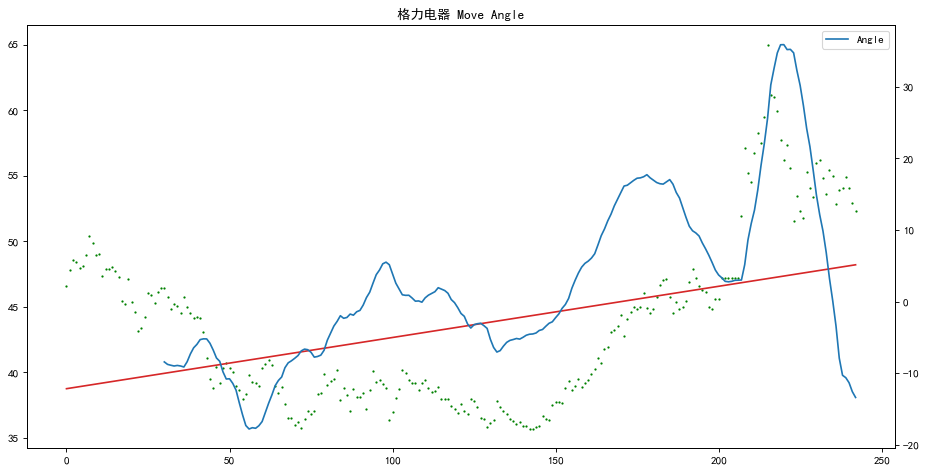

In [101]:
linear_regmove_close(df_stockload.copy(deep=True))